In [1]:
# Import packages
import numpy as np
from numpy import random
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
import math

# Aim

To measure half-lives of some radio-nuclides produced in the thermal neutron irradiation of indium and silver metals, as well as to study the growth of the induced activity as a function of irradiation time.

# Experiment 0: Background Radiation

## Method

As in student notes.

## Results

3 counts were taken, for 5 minutes each, on the 18th of February 2021.

Trial | Count
:--:|:--:
1 | 151
2 | 161
3 | 161

This gives a background radiation count per 5 minutes of $154 \pm 6$, calculating sample standard error (as opposed to population standard error.

An additional 4 counts were taken, also for 5 minutes each, on the 25th of February 2021. 

Trial | Count
:--:|:--:
1 | 168
2 | 175
3 | 174
4 | 165

This gives a background radiation count per 5 minutes of $170 \pm 5$, calculating sample standard error (as opposed to population standard error).

## Discussion

This is quite an interesting result, as both of these counts are substantially different. When taken together, the background radition can be taken as $165 \pm 8$. Noting that the standard deviation of a Poisson distribution at this point is $\sqrt{\lambda} = 13$, I'll try not to be too concerned about this.

Note that we do have all earlier results being smaller than all later results. The probability of such an event occurring can be found by finding the number of combinations of 3 measurements taken from a sample of 7 there are, and taking the reciprical of this. Note that this will overestimate the probability, since it does not account for counts that may be the same.
$$ ^nC_r = \frac{n!}{r!(n - r)!} \\ = 35 $$ 
Hence the $p$-value for this is $1/35 \approx 0.0286$. This is beyond the normal threshold for a statisticslly significant result, and while I'm not sure if background radiation changes over the course of a week, a much more significant result would be needed to disprove any theories about background radiation. For now, I'll just take the sample of 7 as given, since this shouldn't have a dramatic effect on results anyway.

## Conclusion

Background radiation was around $165 \pm 8$ counts every 5 minutes. Further experimentation would be required to get a more accurate reading and to determine whether or not this background changed substantially over time.

In [2]:
t1 = [151, 161, 161]
print(np.mean(t1), np.std(t1, ddof = 1))
t2 = [168, 175, 174, 165]
print(np.mean(t2), np.std(t2, ddof = 1))
t3 = t1 + t2
rad_mean = np.mean(t3)
rad_std = np.std(t3, ddof = 1)

print(rad_mean, rad_std)
print(np.sqrt(np.mean(t3)))

157.66666666666666 5.773502691896257
170.5 4.795831523312719
165.0 8.34665601703261
12.84523257866513


# Experiment 1: Half Life of In (Indium) Isotope

## Method

As in student notes.

## Results

Note that while the convention (at least, the one that I follow) is to take uncertainties to one significant figure only unless that significant figure is a 1 (or sometimes a 2), I have broken this convention. This is due to the desire to report the counts as they appeared during the experiment and not rounded, and it would be inappropriate to have larger increments for uncertainty than for the actual data. Also note that while the uncertainty in time would be related to the machine and program used and is not known, this uncertainty is considered negligible compared to the count uncertainty and has hence been ignored. Count uncertainty here is just the standard deviation of a Poisson distribution for the specific $\lambda$ values. 

Trial | Ending Time ($s$) | Count
:--:|:--:|:--:
1 | 300 | 3222 $\pm$ 57
2 | 600 | 3100 $\pm$ 56
3 | 900 | 2844 $\pm$ 53
4 | 1200 | 2800 $\pm$ 53
5 | 1500 | 2541 $\pm$ 50
6 | 1800 | 2393 $\pm$ 49
7 | 2100 | 2226 $\pm$ 47
8 | 2400 | 2044 $\pm$ 45
9 | 2700 | 2085 $\pm$ 46
10 | 3000 | 1836 $\pm$ 43
11 | 3300 | 1807 $\pm$ 43
12 | 3600 | 1745 $\pm$ 42

Since this is the rate of exponential decay, the data can be fit to a curve of the form $$ \frac{dn}{dt} = \lambda n_0 e^{-\lambda t} $$ using Python's `scipy.optimize.curve_fit` function, once background radiation has been subtracted. This estimates the parameters in the function as $$ n_0 = (1.54\pm0.03)\times10^7 $$ and $$ \lambda = (2.14\pm0.06)\times10^{-4} $$ where the method of determining uncertainties used is discussed in the discussion below.

All of this data is plotted on the graph below.

[1.53893215e+07 2.13743522e-04]
[323298.7837710326, 6.4517086613516385e-06]


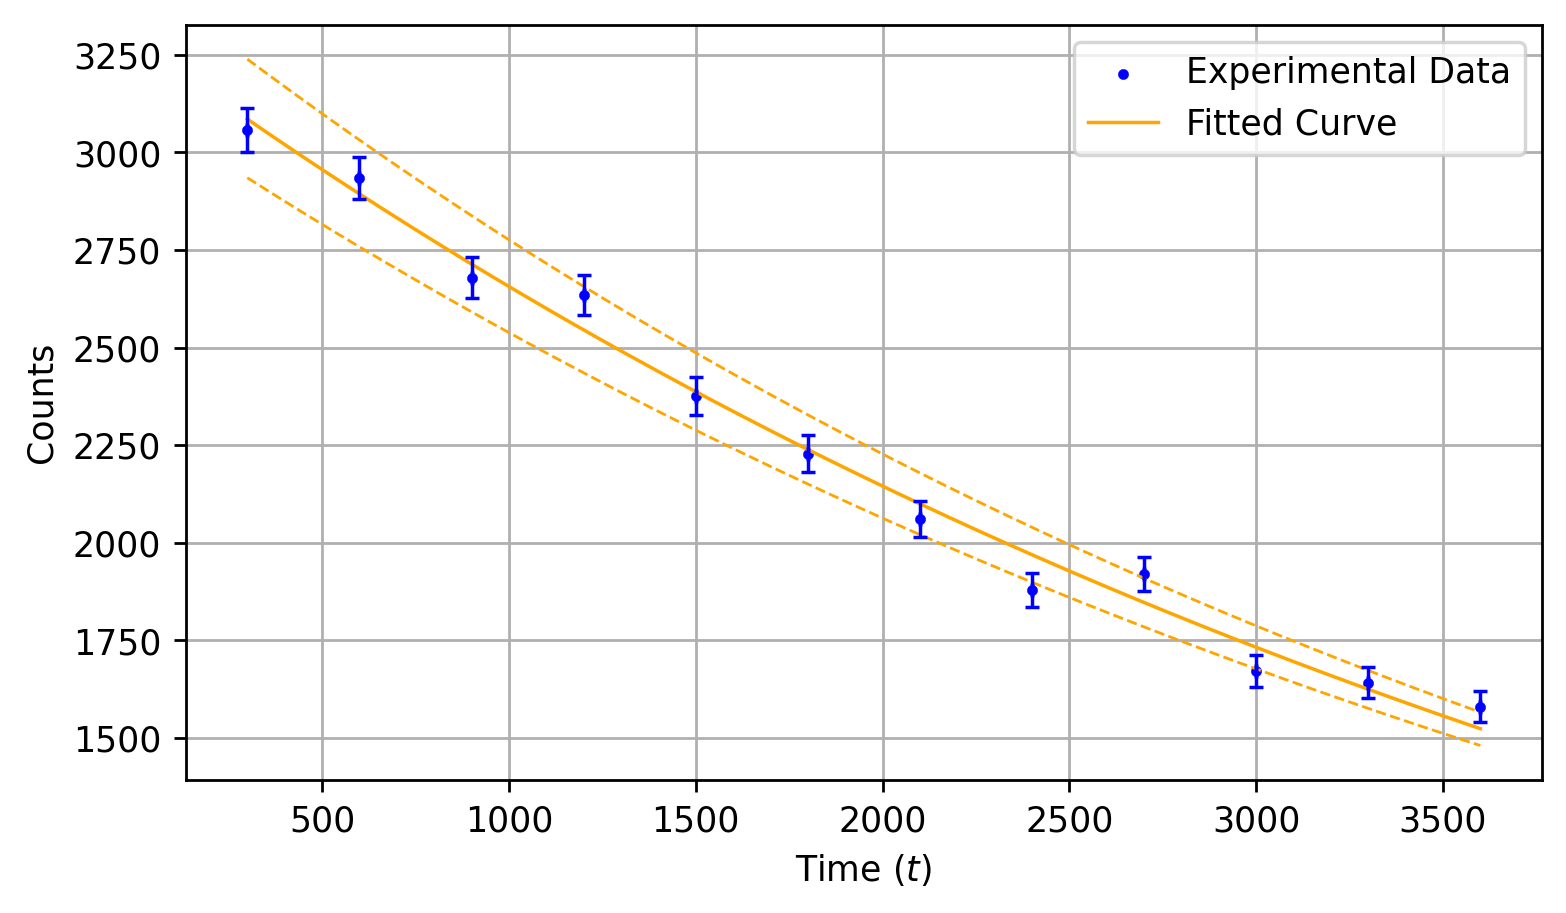

3242.8921132130677
98.23175712925925
54.04820188688446
1.637195952154321


In [3]:
# Arrays of results
time = [300, 600, 900, 1200, 1500, 1800, 2100, 2400, 2700, 3000, 3300, 3600]
count = [3222, 3100, 2844, 2800, 2541, 2393, 2226, 2044, 2085, 1836, 1807, 1745]

for i in range(len(count)):
    count[i] -= rad_mean # background

# Exponential decay rate function
def decayRate(t, n0, h): # h substitutes for lambda
    return h * n0 * np.exp(-h * t)

# Errors
countErrors = []
for c in count:
    countErrors.append(np.sqrt(c))

# Optimise exponential decay curve fit
popt, pcov = sp.optimize.curve_fit(decayRate, time, count, p0 = [10000, 0.001])
#print(popt)
halfLife = np.log(2) / popt[1]

def optDecayRate(t):
    return popt[1] * popt[0] * np.exp(-popt[1] * t)

# Uncertainty calculations
lambdas = []
n0s = []
halfLives = []
for _ in range(10000):
    countNoise = []
    bNoise = np.random.normal(rad_mean, rad_std)
    for c in count:
        countNoise.append(np.random.poisson(c) + (np.random.poisson(bNoise) - rad_mean)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(decayRate, time, countNoise, p0 = [10000, 0.001])
    lambdas.append(poptErr[1])
    n0s.append(poptErr[0])
    halfLives.append(np.log(2) / poptErr[1])
herr = np.std(lambdas)
nerr = np.std(n0s)
print(popt)
print([nerr, herr])

h = popt[1]

    
def minDecayRate(t):
    return (popt[1] - herr) * (popt[0] - nerr) * np.exp(-(popt[1] - herr) * t)

def maxDecayRate(t):
    return (popt[1] + herr) * (popt[0] + nerr) * np.exp(-(popt[1] + herr) * t)

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(time, count, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
s = np.linspace(min(time), max(time), 2500)
plt.plot(s, optDecayRate(s), c = 'orange', linewidth = 1, label = 'Fitted Curve')
plt.plot(s, minDecayRate(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, maxDecayRate(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.grid()
plt.errorbar(time, count, fmt='b,', xerr = 0, yerr = countErrors, capsize = 2, linewidth = 1)
plt.xlabel('Time ($t$)')
plt.ylabel('Counts')
plt.legend()
plt.show()

print(halfLife)
print(np.std(halfLives))
print(halfLife / 60)
print(np.std(halfLives) / 60)

## Questions

1. *Which In isotope’s half-life have you measured? How does your half-life compare with the normally accepted value?*

    From the table, it looks like we've measured the half-life of Indium-116m$_1$. The half-life given for this is 54.1 minutes, which is very close to our experimentally measured value (see *Analysis of Results*) and well within uncertainty.
    
## Discussion

### Analysis of Results

From the data above, it's possible to calculate the half-life of the Indium sample. Using the formula $$ \tau_{1/2} = \frac{\ln(2)}\lambda $$ we can find that $$ \tau_{1/2} = 3240 \pm 100 \text{ s} $$ or $$ \tau_{1/2} = 54.0 \pm 1.6
\text{ min}. $$ Looking at the graph, this makes a lot of sense - the count drops by just over half over the hour, suggesting the half life is somewhere just under an hour. As mentioned in the question above, this fits well to the value given in the appendices of the student notes.

### Uncertainties

The combination of the formulae used here and the specific places that experimental noise comes in make determining uncertainties analytically here a difficult task. Of course it would be possible to do, but the algebra would be very tedious and it's much easier to just ask Python very nicely to do it instead.

To determine the uncertainties, noise was added to the raw data from the experiment. Noise was added in two different places:
- Total count
- Background noise

In both of these cases, the distributions follow Poisson statistics, so Python's `np.random.poisson` function was used to add noise from the given mean. In the case of the background noise, additional noise (normally distributed) was added to the mean *before* it was given to the Poisson randomiser to account for the additional uncertainty in this value. Note that this additional uncertainty was not given to each data point in turn, rather, it was calculated in advance and given to all data points in the trial. From here, `scipy.optimize.curve_fit` was used on the new data set to determine a new set of parameters (as well as half-life). This process was repeated 100,000 times, and standard deviations extracted from all of the 'optimised' parameters was used for uncertainty. 

### Sources of Error

There were several sources of error in this experiment. Some were substantial, while others were so small as to be dismissed as negligible.

The significant sources of error were in the counts. The nature of these counts are that they follow a Poisson distribution, which has an uncertainty of $\sqrt{n}$. Given the size of the counts this error is substantial, and was the main source of error in carrying out this experiment. A future experiment may carry out more hour-long trials with similar samples to narrow the errors, but did not permit us to do this this time around.

It is possible that there were slight errors in timing with the equipment. We were not aware of any uncertainty in time associated with the machine, but have assumed for the purposes of this analysis that any such errors are negligible compared to the errors in the count.

The main source of error that *was* controlled for was the background radiation. This was measured in 'Experiment 0' and the errors from it propagated into the results for this experiment. Had this not been controlled for, the results would have been substantially different (about 4 minutes longer for half-life, from when I did this analysis while forgetting to account for it).

### Future Improvements and Extensions

One possible improvement to this experiment would be to decrease the amount of time for each count, while increasing the number of actual counts (so keeping the total measuring time the same). This would potentially give a better idea of the decay curve, and would also allow some analysis of whether or not the radiation events here having all been lumped together in 5 minute intervals has affected the results. This was done with copper (60s intervals instead of 300s) in one of the later experiments, but the counts there are substantially lower than with the indium and doing this process with indium would likely yield better data.

Another possible improvement, which would allow for an extension of this analysis, would be to start recording radiation as soon as possible after taking the sample out of the well. It's likely some other isotope would have an affect for shorter time periods, but it's easy to ignore the first few data points and it would be interesting to see things such as what this isotope actually is and whether it decays into a stable isotope or one that decays further (possibly In-116m$_1$). This was done for silver in a later experiment but again, it would be nice to see here too.

## Conclusion

This experiment successfully determined the half-life of In-116m$_1$ to be $54.0\pm1.6$ minutes. This is very close to the accepted value of 54.1 minutes, as given in the appendices to the student notes.

# Experiment 2: Growth of In Activity

## Method

As in student notes.

## Results

### Attempt 1

Results for this experiment were all collected over one afternoon. As before, while convention is to usually only report errors to one significant figure, they are reported to higher levels of accuracy here so that the counts are still just a copy of raw data. Adjusted count is the count adjusted for the flux ratios in different wells, after subtracting the background radiation. Briefly on uncertainties, the uncertrainty in count accounts for error due to the Poissonian nature of the data *only*, while the uncertainty in adjusted count also accounts for the uncertainty in background radiation (percentage uncertainties added in quadrature).

Count Time (minutes) | Count | Adjusted Count
:--:|:--:|:--:
10 | 909 $\pm$ 30 | 804 $\pm$ 28
25 | 1616 $\pm$ 40 | 1466 $\pm$ 37
40 | 2371 $\pm$ 49 | 2382 $\pm$ 50
60 | 3463 $\pm$ 59 | 3892 $\pm$ 67
90 | 2356 $\pm$ 49 | 2213 $\pm$ 46
120 | 3910 $\pm$ 63 | 3745 $\pm$ 60
150 | 5360 $\pm$ 73 | 5351 $\pm$ 74
180 | 3552 $\pm$ 60 | 3726 $\pm$ 63

Already, one can see that there were substantial issues with this experiment. Intuitively, the trend should be positive in some way, but these vary up and down substantially more than would be expected. Regardless, let's continue with this data for the time being. The theory for this part of the experiment suggests that the number of atoms that become a different isotope approaches an asymptote, that is, the curve can be fit to a function of the form $$ \frac{dn}{dt} = A(1 - e^{-bt}) $$ using `scipy.optimize.curve_fit` as before. Using the same methods as in Experiment 1 to find uncertainties, the data has been plotted below, with the asymptote (and uncertainties) in green.

10 | 909 $\pm$ 30 | 804 $\pm$ 28
25 | 1616 $\pm$ 40 | 1466 $\pm$ 37
40 | 2371 $\pm$ 49 | 2382 $\pm$ 50
60 | 3463 $\pm$ 59 | 3892 $\pm$ 67
90 | 2356 $\pm$ 49 | 2213 $\pm$ 46
120 | 3910 $\pm$ 63 | 3745 $\pm$ 60
150 | 5360 $\pm$ 73 | 5351 $\pm$ 74
180 | 3552 $\pm$ 60 | 3726 $\pm$ 63
[4.35113652e+03 1.88458674e-02]
[60.50948935022376, 0.0006522264838949867]


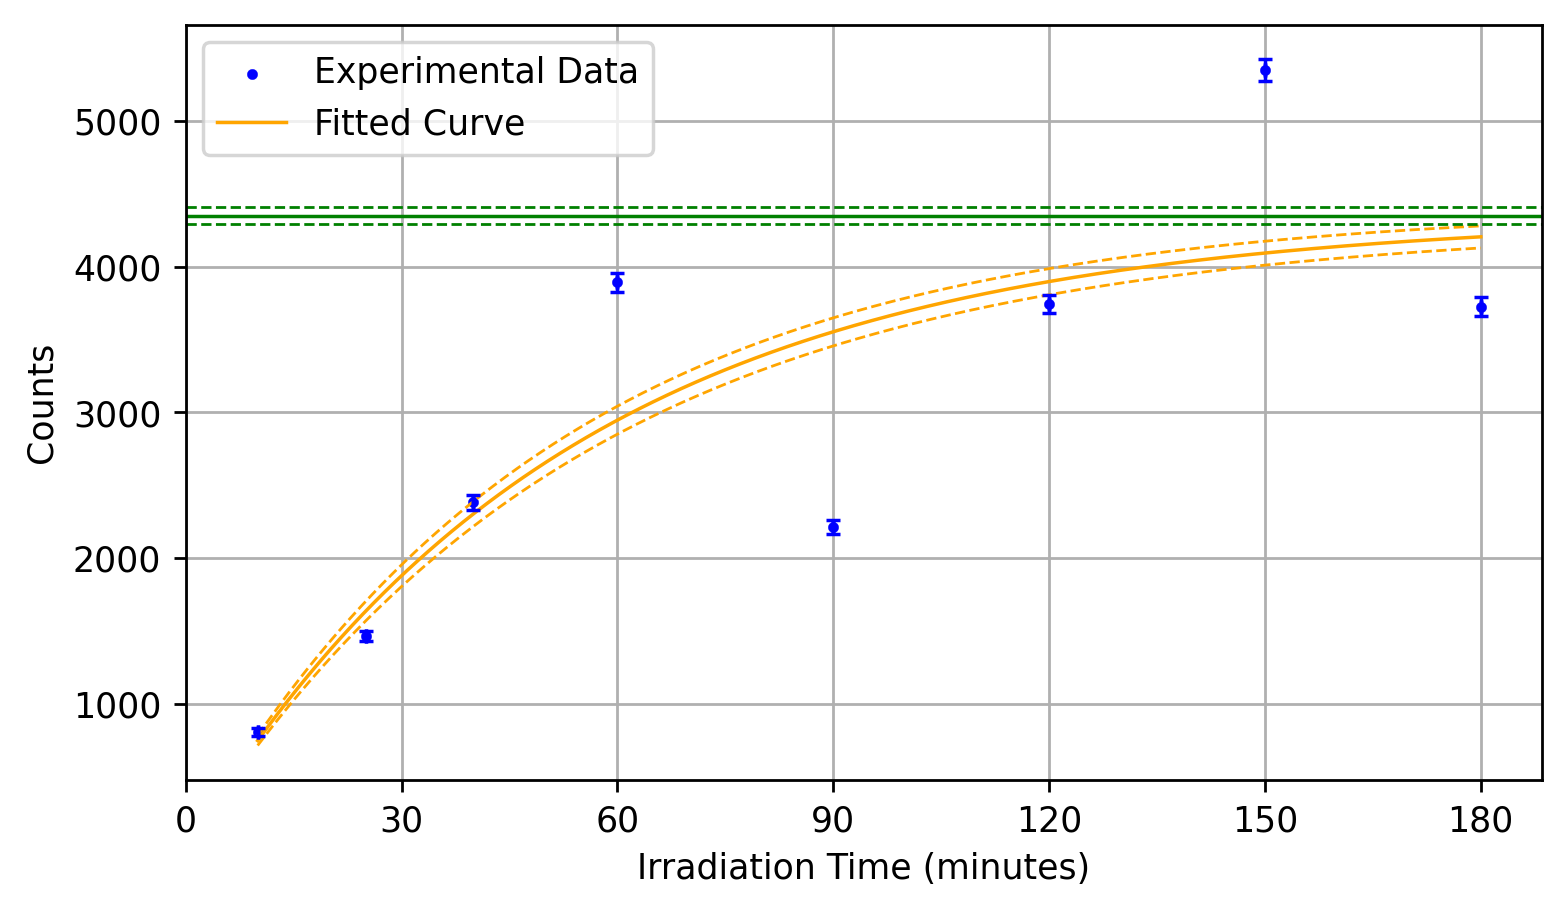

In [4]:
# Results here
time = [10, 25, 40, 60, 90, 120, 150, 180]
count = [909, 1616, 2371, 3463, 2356, 3910, 5360, 3552]
ratio = [1.08, 1.01, 1.08, 1.18, 1.01, 1, 1.03, 1.1]

# Adjust for other factors
countAdjusted = []
for i in range(len(time)):
    x = count[i] - rad_mean # Background
    x *= ratio[i] # Adjust for well ratio
    countAdjusted.append(x)

countErrors = []
for i in range(len(count)):
    countErrors.append(countAdjusted[i] * np.sqrt(1 / count[i] + (rad_std / countAdjusted[i])**2))
    
for i in range(len(time)):
    print(time[i], '|', count[i], '$\pm$', round(np.sqrt(count[i])), '|', round(countAdjusted[i]), '$\pm$', round(countErrors[i]))

# Saturation Curve
def saturation(t, a, b):
    return a * (1 - np.exp(-t * b))

popt, pcov = sp.optimize.curve_fit(saturation, time, count, p0 = [5000, 0.01])

def optSaturation(t):
    return popt[0] * (1 - np.exp(-t * popt[1]))


# Uncertainty calculations
a_s = []
b_s = []
for _ in range(10000):
    countNoise = []
    bError = np.random.normal(rad_mean, rad_std)
    for c in count:
        countNoise.append(np.random.poisson(c) + (np.random.poisson(bError) - rad_mean)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(saturation, time, countNoise, p0 = [5000, 0.01])
    a_s.append(poptErr[0])
    b_s.append(poptErr[1])
aerr = np.std(a_s)
berr = np.std(b_s)
print(popt)
print([aerr, berr])

def minSaturation(t):
    return (popt[0] - aerr) * (1 - np.exp(-(t) * (popt[1] - berr)))

def maxSaturation(t):
    return (popt[0] + aerr) * (1 - np.exp(-(t) * (popt[1] + berr)))

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(time, countAdjusted, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
s = np.linspace(min(time), max(time), 2500)
plt.plot(s, optSaturation(s), c = 'orange', linewidth = 1, label = 'Fitted Curve')
plt.plot(s, minSaturation(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, maxSaturation(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.grid()
plt.errorbar(time, countAdjusted, fmt='b,', xerr = 0, yerr = countErrors, capsize = 2, linewidth = 1)
plt.xlabel('Irradiation Time (minutes)')
plt.ylabel('Counts')
plt.legend()
plt.axhline(y = popt[0] - aerr, c = 'green', linewidth = 0.8, linestyle = 'dashed')
plt.axhline(y = popt[0], c = 'green', linewidth = 1)
plt.axhline(y = popt[0] + aerr, c = 'green', linewidth = 0.8, linestyle = 'dashed')
plt.xticks(np.arange(0, 181, 30))
plt.show()

Dang.

It's very obvious here that something went horrifyingly wrong with this experiment. The first 4 points look fine but from there it't impossible to tell where the trend is actually supposed to go, and there are several sets of points that look like they *could* fit the desired shape. Fortunately, we had tome to redo all points but the first 3 (and these first 3 look inoffensive anyway), so there isn't much point in analysing this data. We have several theories about how this could have happened, but have fairly well debunked all of them so suffice to say we have absolutely no idea on this one. See the Discussion for further information on this.

There's not much point analysing this data set any further, as the results will be fairly meaningless given the state of the data.

### Attempt 2

Keeping the first 3 data points, we fortunately had time to redo the final 5 data points, while retaining the first 3 from the earlier experiment. Happily, the data looks much better (although still not perfect). Reporting data, as before, with more significance in uncertainties as is convention.

Count Time (minutes) | Count | Adjusted Count
:--:|:--:|:--:
10 | 909 $\pm$ 30 | 804 $\pm$ 28
25 | 1616 $\pm$ 40 | 1466 $\pm$ 37
40 | 2371 $\pm$ 49 | 2382 $\pm$ 50
60 | 2825 $\pm$ 53 | 2740 $\pm$ 52
90 | 3466 $\pm$ 59 | 3829 $\pm$ 66
120 | 4686 $\pm$ 68 | 4521 $\pm$ 67
150 | 5227 $\pm$ 72 | 5113 $\pm$ 71
180 | 5491 $\pm$ 74 | 5752 $\pm$ 78

Already, this data looks much better, as the counts are actually increasing consistently with time as opposed to jumping around everywhere. A curve of the same form as before has been fitted, with the optimised parameters being $A = 7000 \pm 160 $ and $b = (9.1 \pm 0.4)\times10^{-3} $. Note that $A$ here is the value of the asymptote i.e. the number of counts that should be recorded between minute 2 and 12 if the sample was left in the well for an infinite amount of time. All of this data is graphed below.

10 | 909 $\pm$ 30 | 804 $\pm$ 28
25 | 1616 $\pm$ 40 | 1466 $\pm$ 37
40 | 2371 $\pm$ 49 | 2382 $\pm$ 50
60 | 2825 $\pm$ 53 | 2740 $\pm$ 52
90 | 3466 $\pm$ 59 | 3829 $\pm$ 66
120 | 4686 $\pm$ 68 | 4521 $\pm$ 67
150 | 5227 $\pm$ 72 | 5113 $\pm$ 71
180 | 5491 $\pm$ 74 | 5752 $\pm$ 78
[6.96820473e+03 9.06697836e-03]
[163.42592834751778, 0.00043327732104541045]


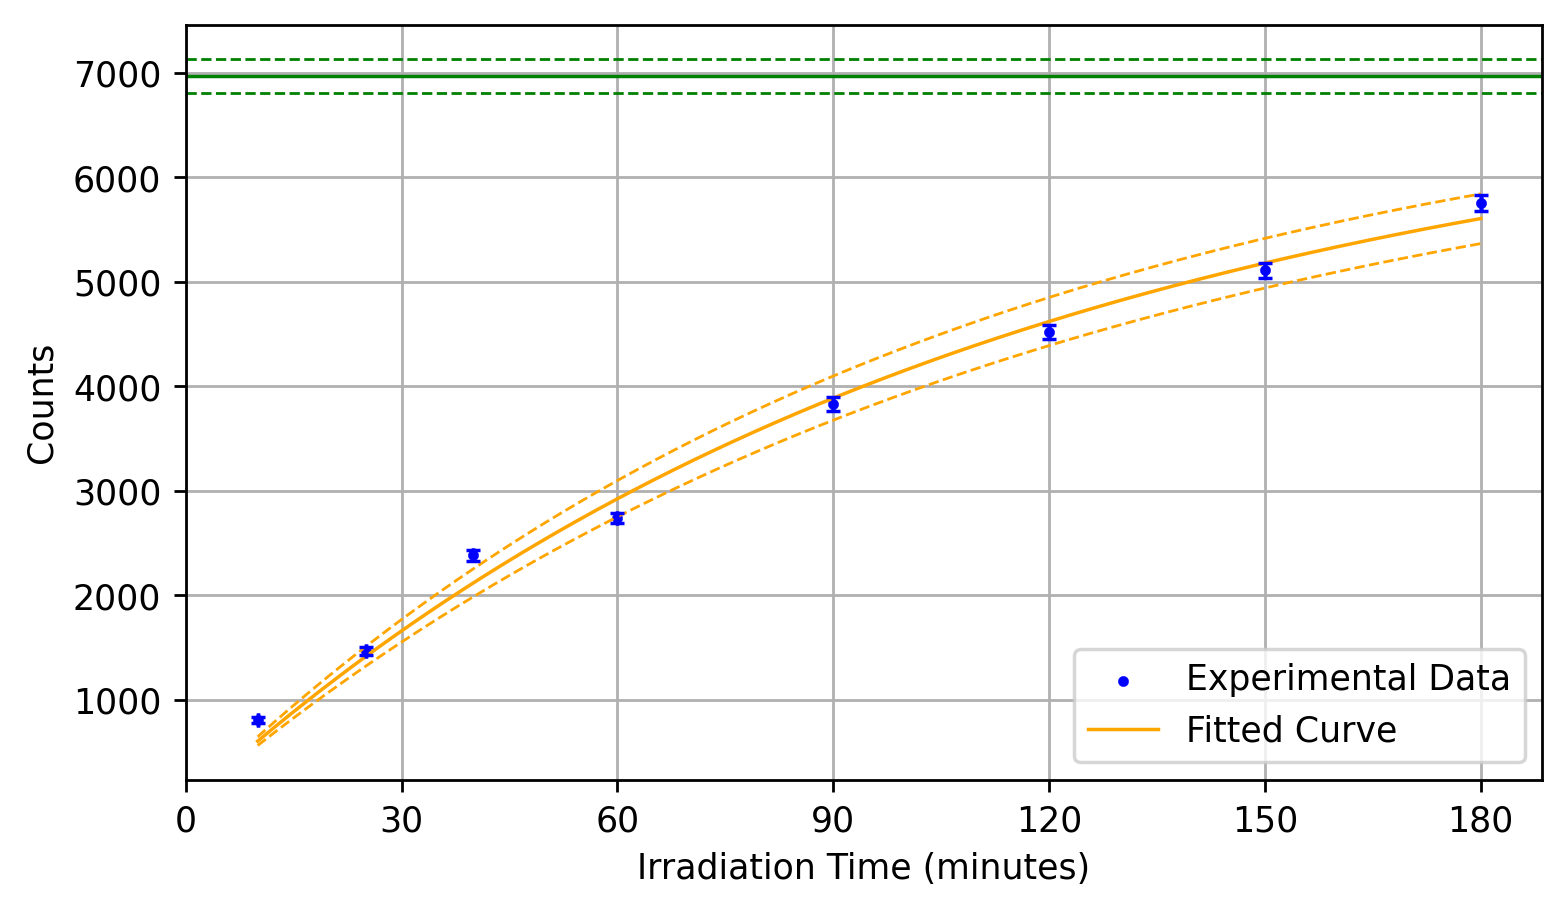

In [5]:
# Results here
time = [10, 25, 40, 60, 90, 120, 150, 180]
count = [909, 1616, 2371, 2825, 3466, 4686, 5227, 5491]
ratio = [1.08, 1.01, 1.08, 1.03, 1.16, 1.00, 1.01, 1.08]

# Adjust for other factors
countAdjusted = []
for i in range(len(time)):
    x = count[i] - rad_mean # Background
    x *= ratio[i] # Adjust for well ratio
    countAdjusted.append(x)

countErrors = []
for i in range(len(count)):
    countErrors.append(countAdjusted[i] * np.sqrt(1 / count[i] + (rad_std / countAdjusted[i])**2))
    
for i in range(len(time)):
    print(time[i], '|', count[i], '$\pm$', round(np.sqrt(count[i])), '|', round(countAdjusted[i]), '$\pm$', round(countErrors[i]))

# Saturation Curve
def saturation(t, a, b):
    return a * (1 - np.exp(-t * b))

popt, pcov = sp.optimize.curve_fit(saturation, time, countAdjusted, p0 = [5000, 0.01])

def optSaturation(t):
    return popt[0] * (1 - np.exp(-t * popt[1]))

# Uncertainty calculations
a_s = []
b_s = []
for _ in range(10000):
    countNoise = []
    bError = np.random.normal(rad_mean, rad_std)
    for c in count:
        countNoise.append(np.random.poisson(c) + (np.random.poisson(bError) - rad_mean)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(saturation, time, countNoise, p0 = [5000, 0.01])
    a_s.append(poptErr[0])
    b_s.append(poptErr[1])
aerr = np.std(a_s)
berr = np.std(b_s)
print(popt)
print([aerr, berr])

def minSaturation(t):
    return (popt[0] - aerr) * (1 - np.exp(-(t) * (popt[1] - berr)))

def maxSaturation(t):
    return (popt[0] + aerr) * (1 - np.exp(-(t) * (popt[1] + berr)))

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(time, countAdjusted, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
s = np.linspace(min(time), max(time), 2500)
plt.plot(s, optSaturation(s), c = 'orange', linewidth = 1, label = 'Fitted Curve')
plt.plot(s, minSaturation(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, maxSaturation(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.grid()
plt.errorbar(time, countAdjusted, fmt='b,', xerr = 0, yerr = countErrors, capsize = 2, linewidth = 1)
plt.xlabel('Irradiation Time (minutes)')
plt.ylabel('Counts')
plt.legend()
plt.axhline(y = popt[0] - aerr, c = 'green', linewidth = 0.8, linestyle = 'dashed')
plt.axhline(y = popt[0], c = 'green', linewidth = 1)
plt.axhline(y = popt[0] + aerr, c = 'green', linewidth = 0.8, linestyle = 'dashed')
plt.xticks(np.arange(0, 181, 30))
plt.show()

## Questions

2. *After removing the In sample from the moderator why should you wait at least 1.5 minutes before starting to count?*

    Presumably, the indium sample needs to rest for at least 1.5 minutes due to an additional isotope created during the irradiation process with a shorter half-life. The rest would allow this isotope to decay for long enough that its contribution would be negligible. While this wasn't experimentally tested for indium, it was for silver, which did strongly exhibit this effect.

## Discussion

### Initial Failure Theories

We have several theories as to why the first iteration of this experiment may have failed, although as stated above most of these seem fairly implausible. The reasons for implausibility are given alongside the theory below.

 - **Inconsistent recording device.** While it's possible that the recirding device may have been broken, consistent data from other experiments recorded from the same device seems to render this theory immediately invalid.
 - **Experimental error/randomness.** No, the magnitude of the errors here are so extreme that each of the three major outliers would be a once-in-a-lifetime event on its own.
 - **Varying masses of the samples.** This initially seemed like a good explanation, however upon actually weighing all of the samples there seemed to be no correlation at all with the mass. This is additionally refuted by the fact the experiment *did* return reasonable results on the second attempt.
 - **Mixing up the samples.** This initially seemed like the most probable explanation for the problematic results. The reason we discount this is because of how rigorous our process was. Whenever a sample was placed in a well, the time, well number, and sample number were all recorded. When a sample was removed from a well, the sample number was checked against what had been recorded. In every single case, the sample number matched what was expected, and the maths has been verified confirming that the samples should have been in the wells for the correct periods of time. Therefore, for this to have caused the problem, there would have had to be several unrelated mix-ups and misreading of multiple labels to create a coincidental scenario where these mix-ups somehow cancelled. For this reason, this explanation seems unlikely.
 - **Prior Irradiation.** We were the second group each day this experiment was carried out, to actually carry out the experiment, so the earlier group irradiating some samples could have skewed the results. This seems unlikely to be the cause, however, because i) the magnitude of deviations from what was expected are too large, especially since these recordings were taken at least 3-4 hours after the prior group, and ii) the earlier group was also getting some wildly inaccurate results from this part of the experiment.
 
Unfortunately, it seems impossible to determine what actually went wrong here, and it's a lucky thing that it *did* work out the second time.

### Analysis of Results

There was some confusion about how to apply the different well ratios to the data. The obvious solution is to divide by these ratios, however discussion with the lab managers and looking at what previous markers have accepted suggests that the data should be multiplied by these ratios instead. The original experiment that determined these ratios could not be found, so this could not be confirmed, but multiplying did seem to fit the theory better.

Nevertheless, it is informative to tabulate and graph this data with the ratios divided instead and see what it looks like. The following is an identical copy of the above, except that ratios have been divided instead of multiplied.

Count Time (minutes) | Count | Adjusted Count
:--:|:--:|:--:
10 | 909 $\pm$ 30 | 689 $\pm$ 24
25 | 1616 $\pm$ 40 | 1437 $\pm$ 37
40 | 2371 $\pm$ 49 | 2043 $\pm$ 43
60 | 2825 $\pm$ 53 | 2583 $\pm$ 49
90 | 3466 $\pm$ 59 | 2846 $\pm$ 49
120 | 4686 $\pm$ 68 | 4521 $\pm$ 67
150 | 5227 $\pm$ 72 | 5012 $\pm$ 70
180 | 5491 $\pm$ 74 | 4931 $\pm$ 67

10 | 909 $\pm$ 30 | 689 $\pm$ 24
25 | 1616 $\pm$ 40 | 1437 $\pm$ 37
40 | 2371 $\pm$ 49 | 2043 $\pm$ 43
60 | 2825 $\pm$ 53 | 2583 $\pm$ 49
90 | 3466 $\pm$ 59 | 2846 $\pm$ 49
120 | 4686 $\pm$ 68 | 4521 $\pm$ 67
150 | 5227 $\pm$ 72 | 5012 $\pm$ 70
180 | 5491 $\pm$ 74 | 4931 $\pm$ 67
[6.54290226e+03 8.51009198e-03]
[161.09165270553783, 0.00042681832259726203]


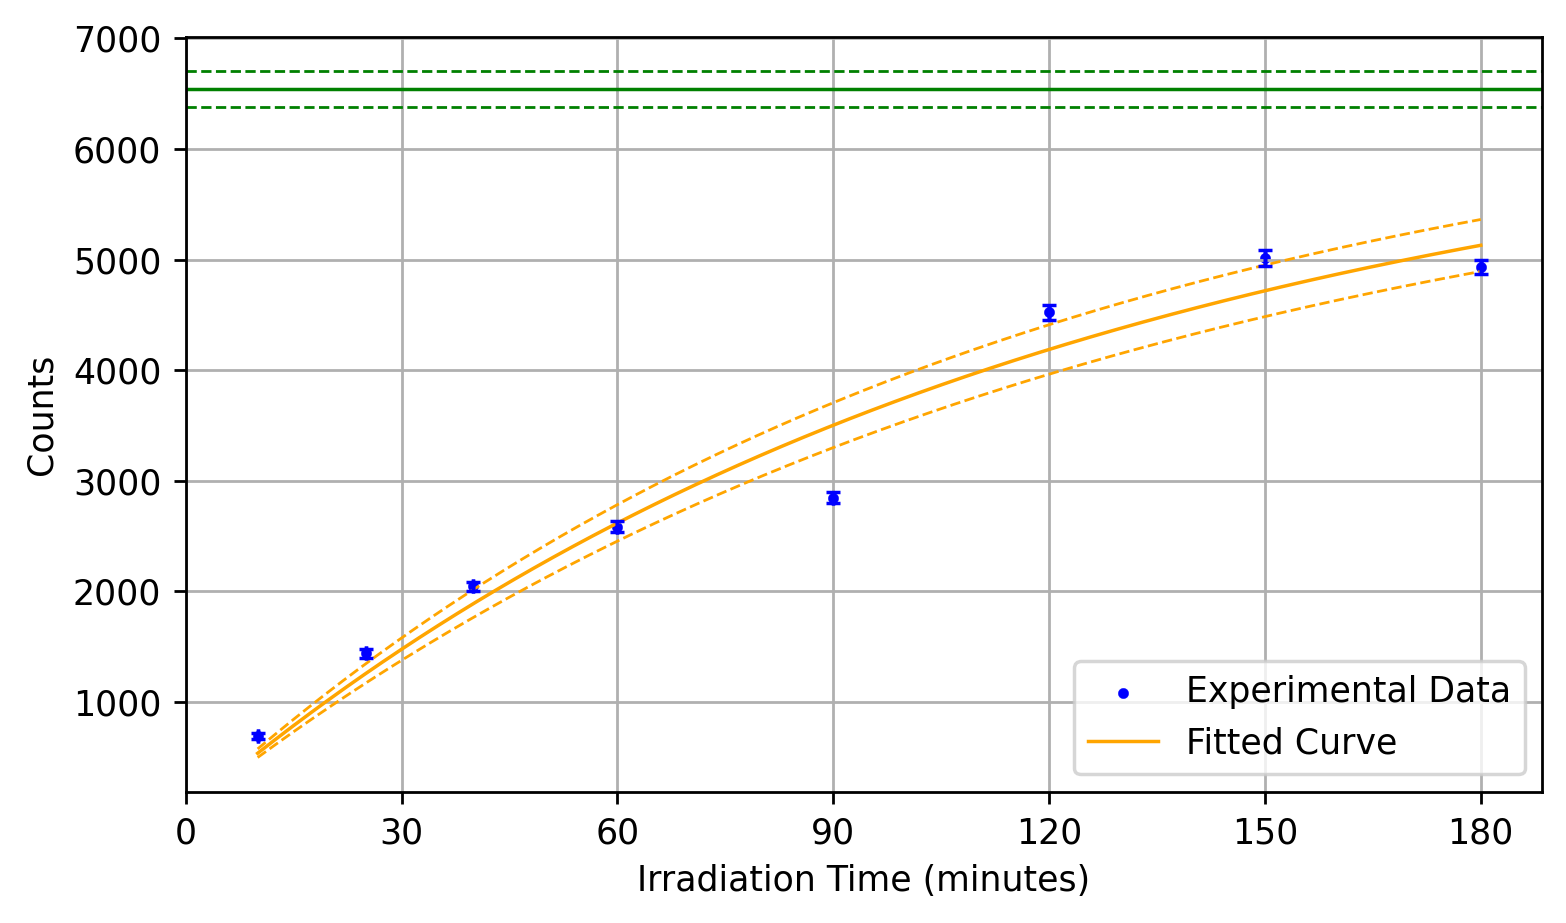

In [6]:
# Results here
time = [10, 25, 40, 60, 90, 120, 150, 180]
count = [909, 1616, 2371, 2825, 3466, 4686, 5227, 5491]
ratio = [1.08, 1.01, 1.08, 1.03, 1.16, 1.00, 1.01, 1.08]

# Adjust for other factors
countAdjusted = []
for i in range(len(time)):
    x = count[i] - rad_mean # Background
    x /= ratio[i] # Adjust for well ratio
    countAdjusted.append(x)

countErrors = []
for i in range(len(count)):
    countErrors.append(countAdjusted[i] * np.sqrt(1 / count[i] + (rad_std / countAdjusted[i])**2))
    
for i in range(len(time)):
    print(time[i], '|', count[i], '$\pm$', round(np.sqrt(count[i])), '|', round(countAdjusted[i]), '$\pm$', round(countErrors[i]))

# Saturation Curve
def saturation(t, a, b):
    return a * (1 - np.exp(-t * b))

popt, pcov = sp.optimize.curve_fit(saturation, time, countAdjusted, p0 = [5000, 0.01])

def optSaturation(t):
    return popt[0] * (1 - np.exp(-t * popt[1]))


# Uncertainty calculations
a_s = []
b_s = []
for _ in range(10000):
    countNoise = []
    bError = np.random.normal(rad_mean, rad_std)
    for c in count:
        countNoise.append(np.random.poisson(c) + (np.random.poisson(bError) - rad_mean)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(saturation, time, countNoise, p0 = [5000, 0.01])
    a_s.append(poptErr[0])
    b_s.append(poptErr[1])
aerr = np.std(a_s)
berr = np.std(b_s)
print(popt)
print([aerr, berr])

def minSaturation(t):
    return (popt[0] - aerr) * (1 - np.exp(-(t) * (popt[1] - berr)))

def maxSaturation(t):
    return (popt[0] + aerr) * (1 - np.exp(-(t) * (popt[1] + berr)))

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(time, countAdjusted, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
s = np.linspace(min(time), max(time), 2500)
plt.plot(s, optSaturation(s), c = 'orange', linewidth = 1, label = 'Fitted Curve')
plt.plot(s, minSaturation(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, maxSaturation(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.grid()
plt.errorbar(time, countAdjusted, fmt='b,', xerr = 0, yerr = countErrors, capsize = 2, linewidth = 1)
plt.xlabel('Irradiation Time (minutes)')
plt.ylabel('Counts')
plt.legend()
plt.axhline(y = popt[0] - aerr, c = 'green', linewidth = 0.8, linestyle = 'dashed')
plt.axhline(y = popt[0], c = 'green', linewidth = 1)
plt.axhline(y = popt[0] + aerr, c = 'green', linewidth = 0.8, linestyle = 'dashed')
plt.xticks(np.arange(0, 181, 30))
plt.show()

Clearly, this data does not fit the theory nearly as well as the previous model. In particular, the point at 90 minutes is the point with the highest ratio (1.18) so this is the most affected point, and it being so much lower than the trend line does suggest that multiplying the ratio was the way to go. The results are roughly similar to those before ($A = 6500 \pm 160 $, $b = (8.5 \pm 0.4)\times10^{-3}$) but assuming dividing is wrong, this is fairly meaningless.

Further to this, from the data above and the half-life found in experiment 1, we can determine and graph the total number of counts that would have been recorded given infinite time, if counting had started immediately. The number of isotope decays observed (theoretically) over a period of time is given by $$ n = \int_{t_0}^{t_1} Ae^{-bt}dt \\ = -\frac{A}{b} e^{-bt}\bigg|_{t_0}^{t_1} \\ = \frac{A}{b} \left( e^{-bt_0} - e^{bt_1} \right) $$ and the total number of decays observed over the lifetime will be $$ N = \int_{0}^{\infty} Ae^{-bt}dt \\ = \lim_{x\rightarrow\infty}\int_{0}^{x} Ae^{-bt}dt \\ = \lim_{x\rightarrow\infty} \frac{A}{b} \left(e^{0} - e^{-bx}\right) \\ = \frac{A}{b}. $$ Hence, the ratio of counts observed between times $t_0$ and $t_1$ is given by $$ \frac{n}{N} = e^{-bt_0} - e^{-bt_1} $$ and, using the half-life (or more accurately, the $b$ parameter value from experiment 1), we can calculate the actual number of expected counts for each sample. 

Now, using $t_0 = 120$ seconds, $t_1 = 720$ seconds, and $b = (2.14\pm0.06)\times10^{-4}$, the ratio can be calculated as $$ \frac{n}{N} = 0.117 \pm 0.006 $$ and we can simply divide the counts by this number (with the uncertainty) to get the total number of counts expected from the sample at the end of each irradiation period. Uncertainty is found by adding percentage uncertainties from i) actual counts and ii) ratio, in quadrature.

Count Time (minutes) | Number of Isotopes
:--:|:--:
10 | 6800 $\pm$ 400
25 | 12500 $\pm$ 700
40 | 20300 $\pm$ 1100
60 | 23400 $\pm$ 1300
90 | 32600 $\pm$ 1800
120 | 39000 $\pm$ 2000
150 | 44000 $\pm$ 2000
180 | 49000 $\pm$ 3000

Note that in this case, normal conventions regarding uncertainty reporting have been followed. The same process as before has been used in generating the line of best fit and its uncertainties, with $A = 59400 \pm 3500$ and $b = (9.1 \pm 0.4) \times 10^{-3}$. Note that $b$ here is identical to before, as would be expected since this is just old values divided by a ratio.

10 | 6849 $\pm$ 424
25 | 12492 $\pm$ 716
40 | 20308 $\pm$ 1124
60 | 23354 $\pm$ 1278
90 | 32640 $\pm$ 1765
120 | 38537 $\pm$ 2056
150 | 43580 $\pm$ 2316
180 | 49031 $\pm$ 2601
[5.93972862e+04 9.06698285e-03]
[3449.7197175620454, 0.000403503940624102]


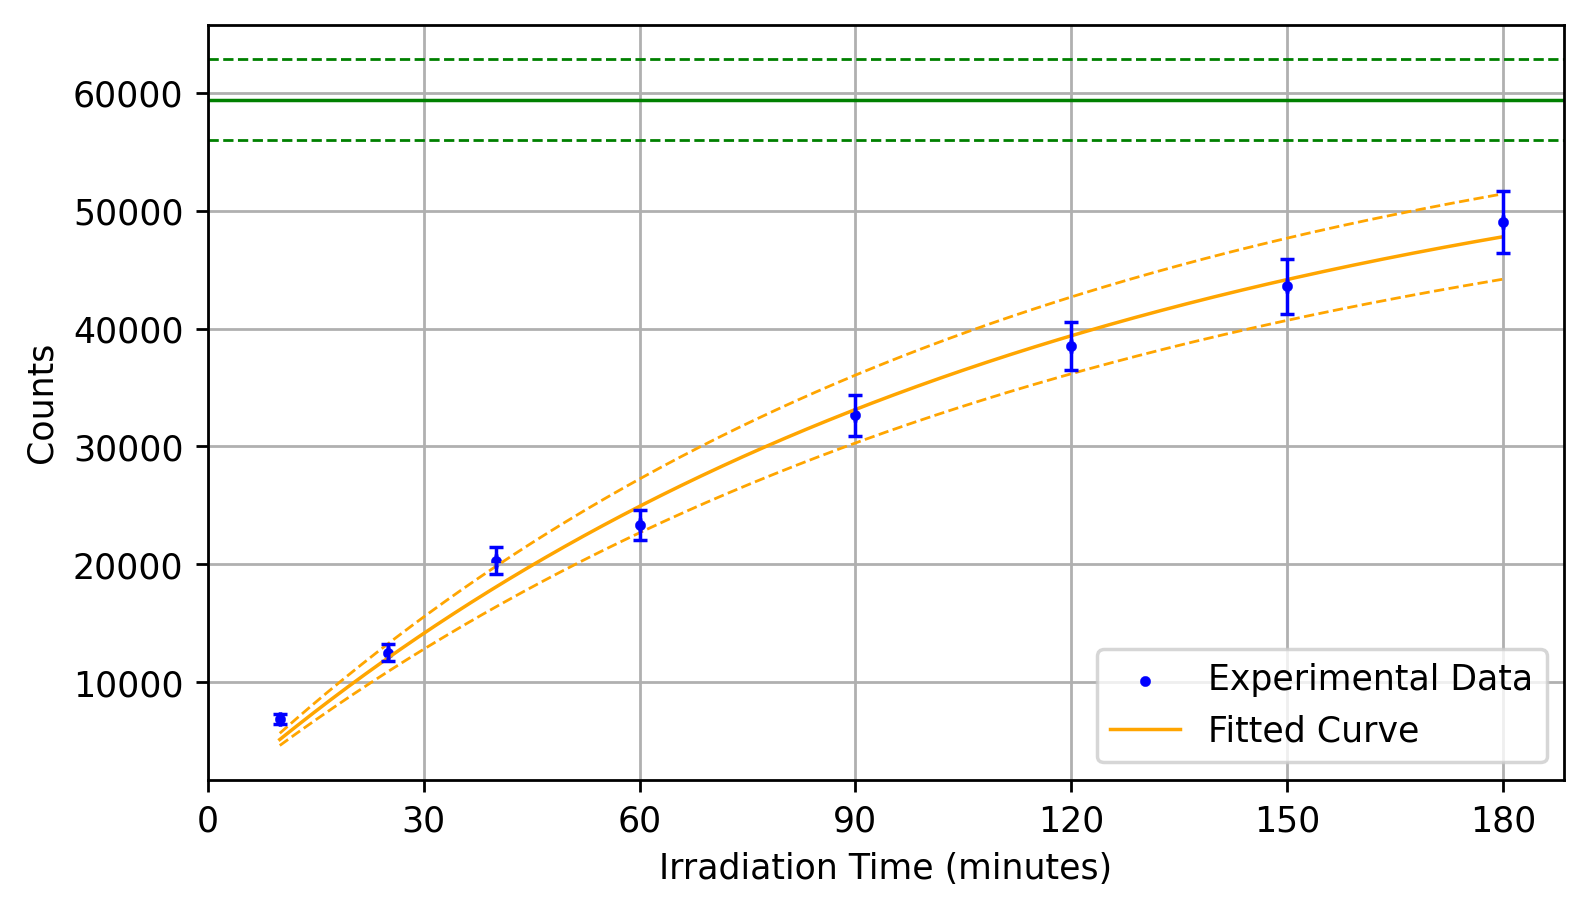

In [7]:
# Results here
time = [10, 25, 40, 60, 90, 120, 150, 180]
count = [909, 1616, 2371, 2825, 3466, 4686, 5227, 5491]
ratio = [1.08, 1.01, 1.08, 1.03, 1.16, 1.00, 1.01, 1.08]

# Adjust for other factors
countAdjusted = []
for i in range(len(time)):
    x = count[i] - rad_mean # Background
    x *= ratio[i] # Adjust for well ratio
    countAdjusted.append(x)

countErrors = []
for i in range(len(count)):
    countErrors.append(countAdjusted[i] * np.sqrt(1 / count[i] + (rad_std / countAdjusted[i])**2))

def totalIsotopes(t0, t1, b, count):
    ratio = np.exp(-b * t0) - np.exp(-b * t1)
    total = count / ratio
    return total, ratio

t0 = 120
t1 = 720

totalCountAdjusted, r = totalIsotopes(t0, t1, h, countAdjusted)

totalErrors = []
for i in range(len(time)):
    totalErrors.append(totalCountAdjusted[i] * np.sqrt((countErrors[i] / countAdjusted[i])**2 + (0.06 / 1.17)**2))
    print(time[i], '|', round(totalCountAdjusted[i]), '$\pm$', round(totalErrors[i]))

    # Saturation Curve
def saturation(t, a, b):
    return a * (1 - np.exp(-t * b))

popt, pcov = sp.optimize.curve_fit(saturation, time, totalCountAdjusted, p0 = [5000, 0.01])

def optSaturation(t):
    return popt[0] * (1 - np.exp(-t * popt[1]))


# Uncertainty calculations
a_s = []
b_s = []
for _ in range(10000):
    countNoise = []
    bError = np.random.normal(rad_mean, rad_std)
    rError = np.random.normal(0.117, 0.006)
    for i in range(len(totalCountAdjusted)):
        countNoise.append(np.random.poisson(countAdjusted[i]) / rError + (np.random.poisson(bError) - rad_mean)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(saturation, time, countNoise, p0 = [5000, 0.01])
    a_s.append(poptErr[0])
    b_s.append(poptErr[1])
aerr = np.std(a_s)
berr = np.std(b_s)
print(popt)
print([aerr, berr])

def minSaturation(t):
    return (popt[0] - aerr) * (1 - np.exp(-(t) * (popt[1] - berr)))

def maxSaturation(t):
    return (popt[0] + aerr) * (1 - np.exp(-(t) * (popt[1] + berr)))

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(time, totalCountAdjusted, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
s = np.linspace(min(time), max(time), 2500)
plt.plot(s, optSaturation(s), c = 'orange', linewidth = 1, label = 'Fitted Curve')
plt.plot(s, minSaturation(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, maxSaturation(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.grid()
plt.errorbar(time, totalCountAdjusted, fmt='b,', xerr = 0, yerr = totalErrors, capsize = 2, linewidth = 1)
plt.xlabel('Irradiation Time (minutes)')
plt.ylabel('Counts')
plt.legend()
plt.axhline(y = popt[0] - aerr, c = 'green', linewidth = 0.8, linestyle = 'dashed')
plt.axhline(y = popt[0], c = 'green', linewidth = 1)
plt.axhline(y = popt[0] + aerr, c = 'green', linewidth = 0.8, linestyle = 'dashed')
plt.xticks(np.arange(0, 181, 30))
plt.show()

Unfortunately, these results don't mean much on their own. This is only the number of counts that would be recorded given the specific experimental setup. See *Future Improvements and Extensions* for discussion on how this process could be improved in order to determine the true number of isotopes, however, the point of this part of the experiment is to show that over the course of such a long analysis, propagated errors can become a lot more substantial when different uncertainties are combined.

### Sources of Error

The sources of error in this experiment are very similar to the sources of error in Experiment 1. While there was more room for errors in time here due to the varying irradiation periods, due to the very strict schedule that was kept, these errors would have never been any more than about 2-3 seconds. Over the course of between 10 minutes (600 seconds) and 3 hours (10,800 seconds), this 2-3 second uncertainty is negligible next to the count error and has therefore been ignored in the analysis. Uncertainty in flux ratios have also been dismissed as negligible compared to the flux count uncertainties.

### Future Improvements and Extensions

Obviously it's difficult to say what could have been changed in the first attempt, given it's not known what went wrong and there isn't even a primary suspected cause. However, it suggests that this experiment might be a difficult one to get right. As such, repeating this experiment several times would be useful to confirm values.

The main extension that could be done here is to add an experiment that checked how counts changed with distance to the receiver, by varying this distance across trials and keeping time constant. From there, and assuming radiation is emitted in all radial directions evenly, it would be possible to determine how many In-116m$_1$ isotopes there were in each sample by using the data to determine what percentage of decays were actually recorded by the apparatus. Since each sample was a disk the assumption of radial emisions from a single point would be potentially problematic (computer simulations *might* be able to get around this, with enough computation time) but it would still be an interesting extension.

### Conclusion

This experiment showed that increasing the amount of time a sample is irradiated does increase the amount of radiation it gives off once removed from the irradiation area. However, it also suggested that there are 'dimishing returns to scale' in that the amount of radiation asymptotes after a certain amount of time, and further irradiation from that point would be fairly useless.

# Experiment 3: Half Life of Ag Isotope

## Method

As in student notes.

## Results

Presentation of the results here is more or less the same as in *Experiment 1*. The only difference is that for curve fitting, the first 5 results have been ignored.

Trial | Ending Time ($s$) | Count | Adjusted Count
:--:|:--:|:--:|:--:
1 | 30 | 1999 $\pm$ 45 | 1966 $\pm$ 45
2 | 60 | 1023 $\pm$ 32 | 990 $\pm$ 32
3 | 90 | 559 $\pm$ 24 | 526 $\pm$ 24
4 | 120 | 316 $\pm$ 18 | 283 $\pm$ 18
5 | 150 | 236 $\pm$ 15 | 203 $\pm$ 16
6 | 180 | 204 $\pm$ 14 | 171 $\pm$ 15
7 | 210 | 176 $\pm$ 13 | 143 $\pm$ 14
8 | 240 | 140 $\pm$ 12 | 107 $\pm$ 12
9 | 270 | 109 $\pm$ 10 | 76 $\pm$ 11
10 | 300 | 116 $\pm$ 11 | 83 $\pm$ 11
11 | 330 | 88 $\pm$ 9 | 55 $\pm$ 10
12 | 360 | 78 $\pm$ 9 | 45 $\pm$ 10
13 | 390 | 64 $\pm$ 8 | 31 $\pm$ 9
14 | 420 | 61 $\pm$ 8 | 28 $\pm$ 9
15 | 450 | 51 $\pm$ 7 | 18 $\pm$ 9

The fitted parameters here are $n_0 = (9.8 \pm 0.5)\times10^4$ and $\lambda = (5.2 \pm 0.5)\times10^{-3}$. This has been plotted below, for now, excluding the first 5 points.

1 | 30 | 1999 $\pm$ 45 | 1966 $\pm$ 45
2 | 60 | 1023 $\pm$ 32 | 990 $\pm$ 32
3 | 90 | 559 $\pm$ 24 | 526 $\pm$ 24
4 | 120 | 316 $\pm$ 18 | 283 $\pm$ 18
5 | 150 | 236 $\pm$ 15 | 203 $\pm$ 16
6 | 180 | 204 $\pm$ 14 | 171 $\pm$ 15
7 | 210 | 176 $\pm$ 13 | 143 $\pm$ 14
8 | 240 | 140 $\pm$ 12 | 107 $\pm$ 12
9 | 270 | 109 $\pm$ 10 | 76 $\pm$ 11
10 | 300 | 116 $\pm$ 11 | 83 $\pm$ 11
11 | 330 | 88 $\pm$ 9 | 55 $\pm$ 10
12 | 360 | 78 $\pm$ 9 | 45 $\pm$ 10
13 | 390 | 64 $\pm$ 8 | 31 $\pm$ 9
14 | 420 | 61 $\pm$ 8 | 28 $\pm$ 9
15 | 450 | 51 $\pm$ 7 | 18 $\pm$ 9
[9.82998021e+04 5.32262546e-03]
[5194.9699906528285, 0.0004976406003851359]


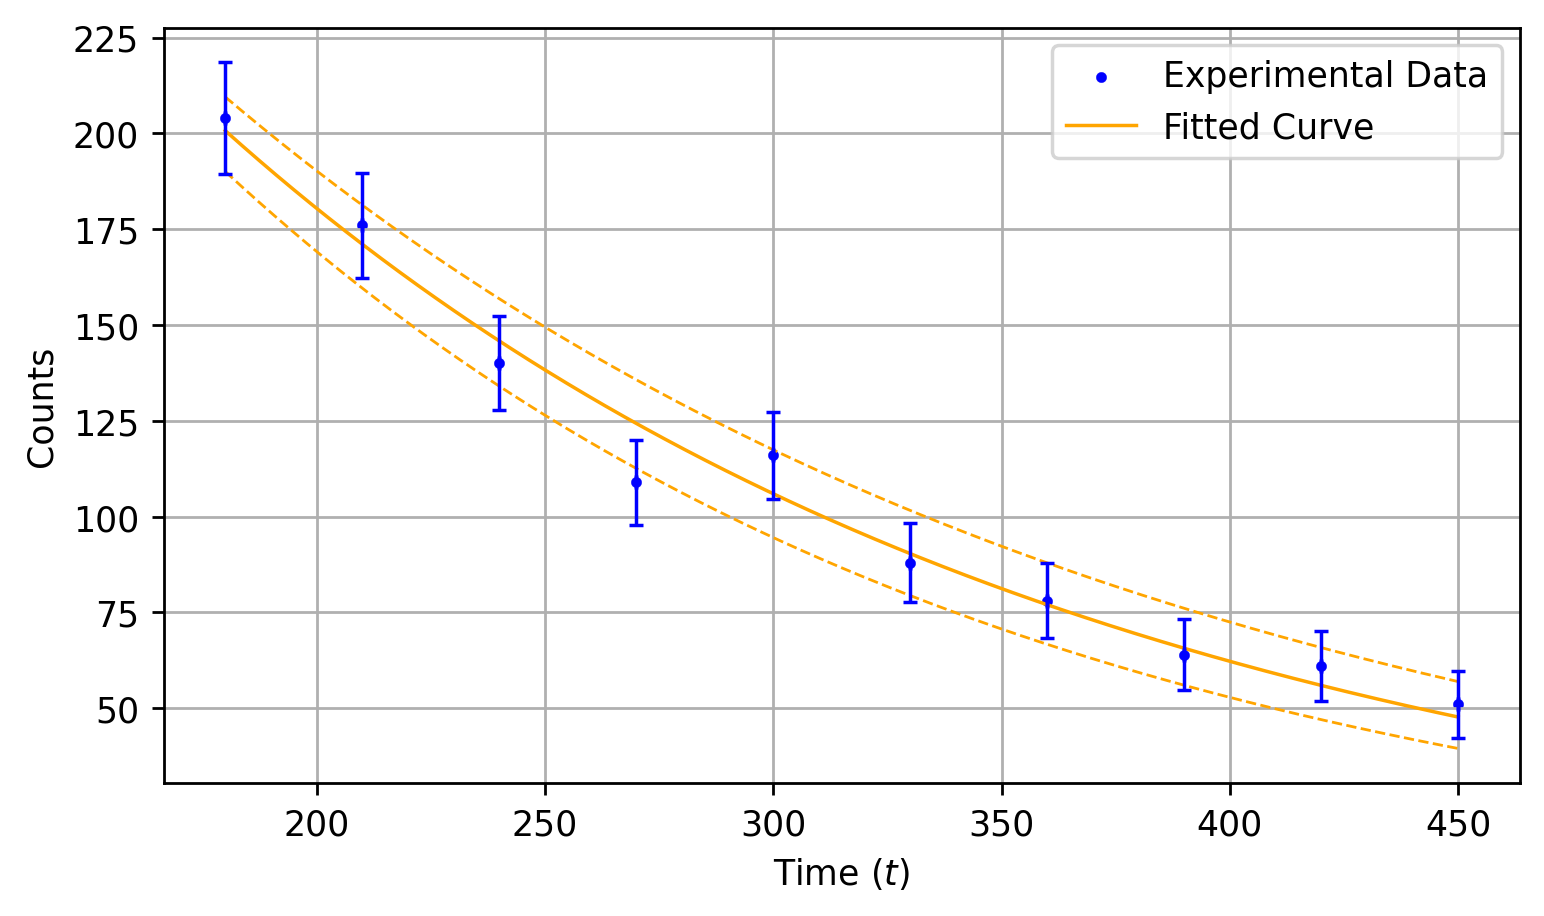

130.226555696416
12.37542700942714
2.170442594940267
0.20625711682378567


In [8]:
# Results here
count = [1999, 1023, 559, 316, 236, 204, 176, 140, 109, 116, 88, 78, 64, 61, 51]
time = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450]

# Adjust for other factors
countAdjusted = []
for i in range(len(time)):
    x = count[i] - rad_mean / 5 # Background
    countAdjusted.append(x)

countErrors = []
for i in range(len(count)):
    countErrors.append(countAdjusted[i] * np.sqrt(1 / count[i] + (rad_std / countAdjusted[i])**2))

def decayRate(t, n0, h): # h substitutes for lambda
    return h * n0 * np.exp(-h * t)

for i in range(len(time)):
    print(i + 1, '|', time[i],'|', count[i], '$\pm$', round(np.sqrt(count[i])), '|', round(countAdjusted[i]), '$\pm$', round(countErrors[i]))

# Optimise exponential decay curve fit
popt, pcov = sp.optimize.curve_fit(decayRate, time[5:], count[5:], p0 = [10000, 0.001])
halfLife = np.log(2) / popt[1]

def optDecayRate(t):
    return popt[1] * popt[0] * np.exp(-popt[1] * t)

# Uncertainty calculations
lambdas = []
n0s = []
halfLives = []
for _ in range(10000):
    countNoise = []
    bNoise = np.random.normal(rad_mean, rad_std)
    for c in count:
        countNoise.append(np.random.poisson(c) + (np.random.poisson(bNoise/5) - rad_mean/5)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(decayRate, time[5:], countNoise[5:], p0 = [10000, 0.001])
    lambdas.append(poptErr[1])
    n0s.append(poptErr[0])
    halfLives.append(np.log(2) / poptErr[1])
herr = np.std(lambdas)
nerr = np.std(n0s)
print(popt)
print([nerr, herr])

h = popt[1]

    
def minDecayRate(t):
    return (popt[1] - herr) * (popt[0] + nerr) * np.exp(-(popt[1] - herr) * t)

def maxDecayRate(t):
    return (popt[1] + herr) * (popt[0] - nerr) * np.exp(-(popt[1] + herr) * t)

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(time[5:], count[5:], marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
s = np.linspace(min(time[5:]), max(time[5:]), 2500)
plt.plot(s, optDecayRate(s), c = 'orange', linewidth = 1, label = 'Fitted Curve')
plt.plot(s, minDecayRate(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, maxDecayRate(s), c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.grid()
plt.errorbar(time[5:], count[5:], fmt='b,', xerr = 0, yerr = countErrors[5:], capsize = 2, linewidth = 1)
plt.xlabel('Time ($t$)')
plt.ylabel('Counts')
plt.legend()
plt.show()

print(halfLife)
print(np.std(halfLives))
print(halfLife / 60)
print(np.std(halfLives) / 60)



## Questions

3. *Which Ag isotope’s half-life have you measured and how does your value compare with that normally accepted?*

    This one is a little more tricky to determine than with Indium, since the uncertainty in half-life is large enough that many different isotopes could fit. Given natural abundances and out experimental results, the most likely isotope appears to be Ag-108, with a half-life of 2.4 minutes (within our uncertainty bounds).


4. *Why are the first few points well off the curve of best fit?*

    The first few points are well off the curve due, presumably due to another isotope with a shorter half-life being present. The counts due to this isotope were much higher due to the shorter half-life and hence do not fit the curve for the isotope with the longer half-life. This is also why the indium was given 2 minutes to think before being recorded.
    
    Note: see *Extension: Finding the Other Isotope* for this graph.

    
5. *How could you determine the half-life of the Ag isotopes more precisely?*

    There are several ways that half-life could be determined more precisely. The first, and probably easiest, would be to increase the number of counts taken at a given time after being removed from irradiation. This could be achieved by either doing more runs, or by stacking the silver samples in the apparatus. The other way this could be achieved is to reduce the count time as low as possible (still the same total time, with more counting 'periods') to better fit to the expected distribution.
    
## Discussion

### Analysis of Results

Using the same method as in *Experiment 1*, the half-life of the particular isotope measured above is $$ \tau_{1/2} = 130 \pm 12 \text{ s} $$ or $$ \tau_{1/2} = 2.2 \pm 0.2 \text{ minutes.} $$ As in the earlier experiment, this value makes a lot of sense looking at the graph, since by inspection the counts drop by around half in 2-3 minutes.

### Extension: Finding the Other Isotope

It's very clear that there was another isotope that is decaying in the first couple of minutes of the experiment. If the results above are taken as given, the expected counts from the isotope with the longer half-life can be subtracted and a new curve of the same firm fit to determine the half-life of the other isotope. The resultant parameters here were $n_0 = (1.25 \pm 0.10)\times10^5$ and $\lambda = (3.3 \pm 0.4)\times10^{-2}$. Below is a graph of the best-fit curves for both isotopes, as well as their sum.

[9.82998021e+04 5.32262546e-03]
[5123.237702007307, 0.0004868332298775813]
[1.24960425e+05 3.34636153e-02]
[10047.809757503133, 0.0037805529246336222]


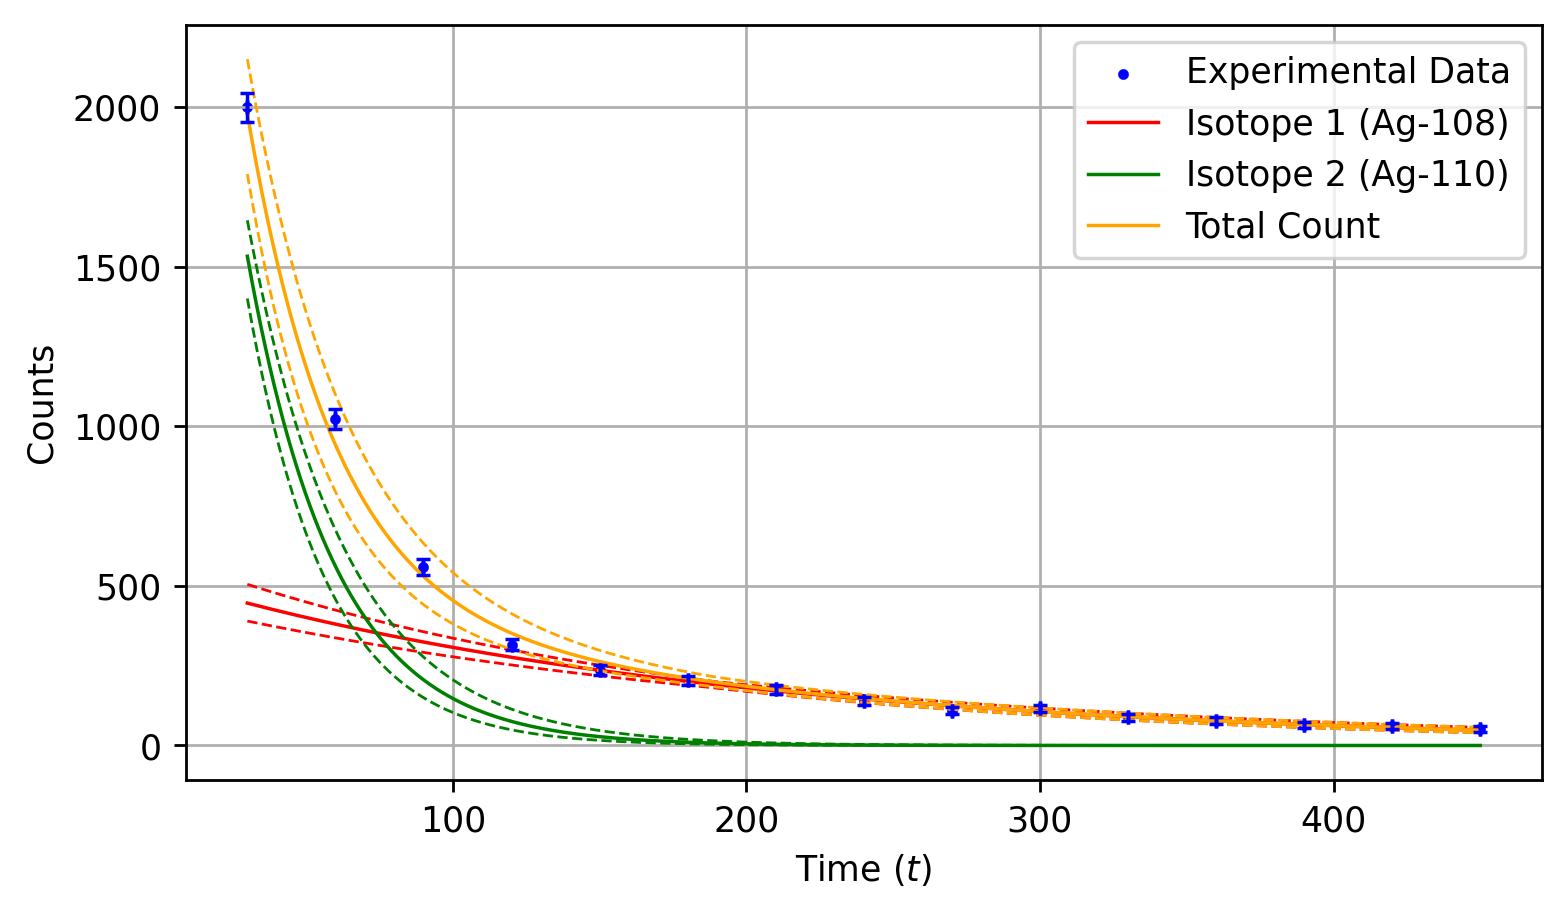

20.713457722689235
2.2629421708758737


In [9]:
# Results here
count = [1999, 1023, 559, 316, 236, 204, 176, 140, 109, 116, 88, 78, 64, 61, 51]
time = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450]

# Adjust for other factors
countAdjusted = []
for i in range(len(time)):
    x = count[i] - rad_mean / 5 # Background
    countAdjusted.append(x)

countErrors = []
for i in range(len(count)):
    countErrors.append(countAdjusted[i] * np.sqrt(1 / count[i] + (rad_std / countAdjusted[i])**2))

def decayRate(t, n0, h): # h substitutes for lambda
    return h * n0 * np.exp(-h * t)

# Optimise exponential decay curve fit
popt, pcov = sp.optimize.curve_fit(decayRate, time[5:], count[5:], p0 = [10000, 0.001])
halfLife = np.log(2) / popt[1]

def optDecayRate(t):
    return popt[1] * popt[0] * np.exp(-popt[1] * t)

# Uncertainty calculations
lambdas = []
n0s = []
halfLives = []
for _ in range(10000):
    countNoise = []
    bNoise = np.random.normal(rad_mean, rad_std)
    for c in count:
        countNoise.append(np.random.poisson(c) + (np.random.poisson(bNoise/5) - rad_mean/5)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(decayRate, time[5:], countNoise[5:], p0 = [10000, 0.001])
    lambdas.append(poptErr[1])
    n0s.append(poptErr[0])
    halfLives.append(np.log(2) / poptErr[1])
herr = np.std(lambdas)
nerr = np.std(n0s)
print(popt)
print([nerr, herr])

h = popt[1]

    
def minDecayRatea(t):
    return (popt[1] - herr) * (popt[0] + nerr) * np.exp(-(popt[1] - herr) * t)

def maxDecayRatea(t):
    return (popt[1] + herr) * (popt[0] - nerr) * np.exp(-(popt[1] + herr) * t)

def minDecayRateb(t):
    return (popt[1] - herr) * (popt[0] - nerr) * np.exp(-(popt[1] - herr) * t)

def maxDecayRateb(t):
    return (popt[1] + herr) * (popt[0] + nerr) * np.exp(-(popt[1] + herr) * t)

def minDecayRate(t):
    return min(minDecayRatea(t), maxDecayRatea(t), minDecayRateb(t), maxDecayRateb(t))
def maxDecayRate(t):
    return max(minDecayRatea(t), maxDecayRatea(t), minDecayRateb(t), maxDecayRateb(t))

# Account for previous curve and redo fit

newCount = []
for i in range(len(count)):
    newCount.append(countAdjusted[i] - optDecayRate(time[i]))

popt2, pcov2 = sp.optimize.curve_fit(decayRate, time, newCount, p0 = [10000, 0.001])
halfLife2 = np.log(2) / popt2[1]

def optDecayRate2(t):
    return popt2[1] * popt2[0] * np.exp(-popt2[1] * t)

# Uncertainty calculations
lambdas2 = []
n0s2 = []
halfLives2 = []
for _ in range(10000):
    countNoise = []
    bNoise = np.random.normal(rad_mean, rad_std)
    for i in range(len(count)):
        countNoise.append(np.random.poisson(countAdjusted[i]) - optDecayRate(time[i]) + np.random.normal(0, abs(minDecayRate(time[i]) - maxDecayRate(time[i]))) + (np.random.poisson(bNoise/5) - rad_mean/5)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(decayRate, time, countNoise, p0 = [10000, 0.001])
    lambdas2.append(poptErr[1])
    n0s2.append(poptErr[0])
    halfLives2.append(np.log(2) / poptErr[1])
herr2 = np.std(lambdas2)
nerr2 = np.std(n0s2)
print(popt2)
print([nerr2, herr2])

def minDecayRate2a(t):
    return (popt2[1] - herr2) * (popt2[0] + nerr2) * np.exp(-(popt2[1] - herr2) * t)

def maxDecayRate2a(t):
    return (popt2[1] + herr2) * (popt2[0] - nerr2) * np.exp(-(popt2[1] + herr2) * t)

def minDecayRate2b(t):
    return (popt2[1] - herr2) * (popt2[0] - nerr2) * np.exp(-(popt2[1] - herr2) * t)

def maxDecayRate2b(t):
    return (popt2[1] + herr2) * (popt2[0] + nerr2) * np.exp(-(popt2[1] + herr2) * t)

def minDecayRate2(t):
    return min(minDecayRate2a(t), maxDecayRate2a(t), minDecayRate2b(t), maxDecayRate2b(t))
def maxDecayRate2(t):
    return max(minDecayRate2a(t), maxDecayRate2a(t), minDecayRate2b(t), maxDecayRate2b(t))


def optTotal(t):
    return optDecayRate(t) + optDecayRate2(t)
def minTotal(t):
    return minDecayRate(t) + minDecayRate2(t)
def maxTotal(t):
    return maxDecayRate(t) + maxDecayRate2(t)

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(time, count, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
s = np.linspace(min(time), max(time), 2500)
plt.plot(s, optDecayRate(s), c = 'red', linewidth = 1, label = 'Isotope 1 (Ag-108)')
min1 = []
max1 = []
for x in s:
    min1.append(minDecayRate(x))
    max1.append(maxDecayRate(x))
plt.plot(s, min1, c = 'red', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, max1, c = 'red', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, optDecayRate2(s), c = 'green', linewidth = 1, label = 'Isotope 2 (Ag-110)')
min2 = []
max2 = []
for x in s:
    min2.append(minDecayRate2(x))
    max2.append(maxDecayRate2(x))
plt.plot(s, min2, c = 'green', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, max2, c = 'green', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, optTotal(s), c = 'orange', linewidth = 1, label = 'Total Count')
minTot = []
maxTot = []
for x in s:
    minTot.append(minTotal(x))
    maxTot.append(maxTotal(x))
plt.plot(s, minTot, c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, maxTot, c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.grid()
plt.errorbar(time, count, fmt='b,', xerr = 0, yerr = countErrors, capsize = 2, linewidth = 1)
plt.xlabel('Time ($t$)')
plt.ylabel('Counts')
plt.legend()
plt.show()

print(halfLife2)
print(np.std(halfLives2))

As before, the half-life of this isotope was $\tau_{1/2} = 21\pm2$ seconds. This looks likely to be Ag-110. With this in mind, it seems likely that the silver sample is made up of both Ag-107 and Ag-109, since both of these are one atomic mass less than the isotopes observed and are both relatively abundant. The observed half-life of Ag-110 is slightly lower than the accepted value, but this is likely to be due to slight errors in the initial Ag-108 curve fit that accounted for a small amount of Ag-110 decay.

This can be slightly corrected for, but requires a slight manipulation. If instead of excluding the first 5 data points in the determination of the Ag-108 decay curve, we exclude the first 7, the data is a little better. Note that 7 was not chosen as a specific point that makes the theory work, rather it was an attempt to halve the data set while making sure that the Ag-108 decay curve still has the majority of the data to work with. It's pretty clear from the decay curve above that the contribution of Ag-110 decay after the 7th point is extremely negligible, so this should give better data when estimating this curve.

[9.04524349e+04 4.70723448e-03]
[8022.7948439816355, 0.0006999993711640403]
[1.31352806e+05 3.13063394e-02]
[13112.428806879196, 0.004766921396320256]


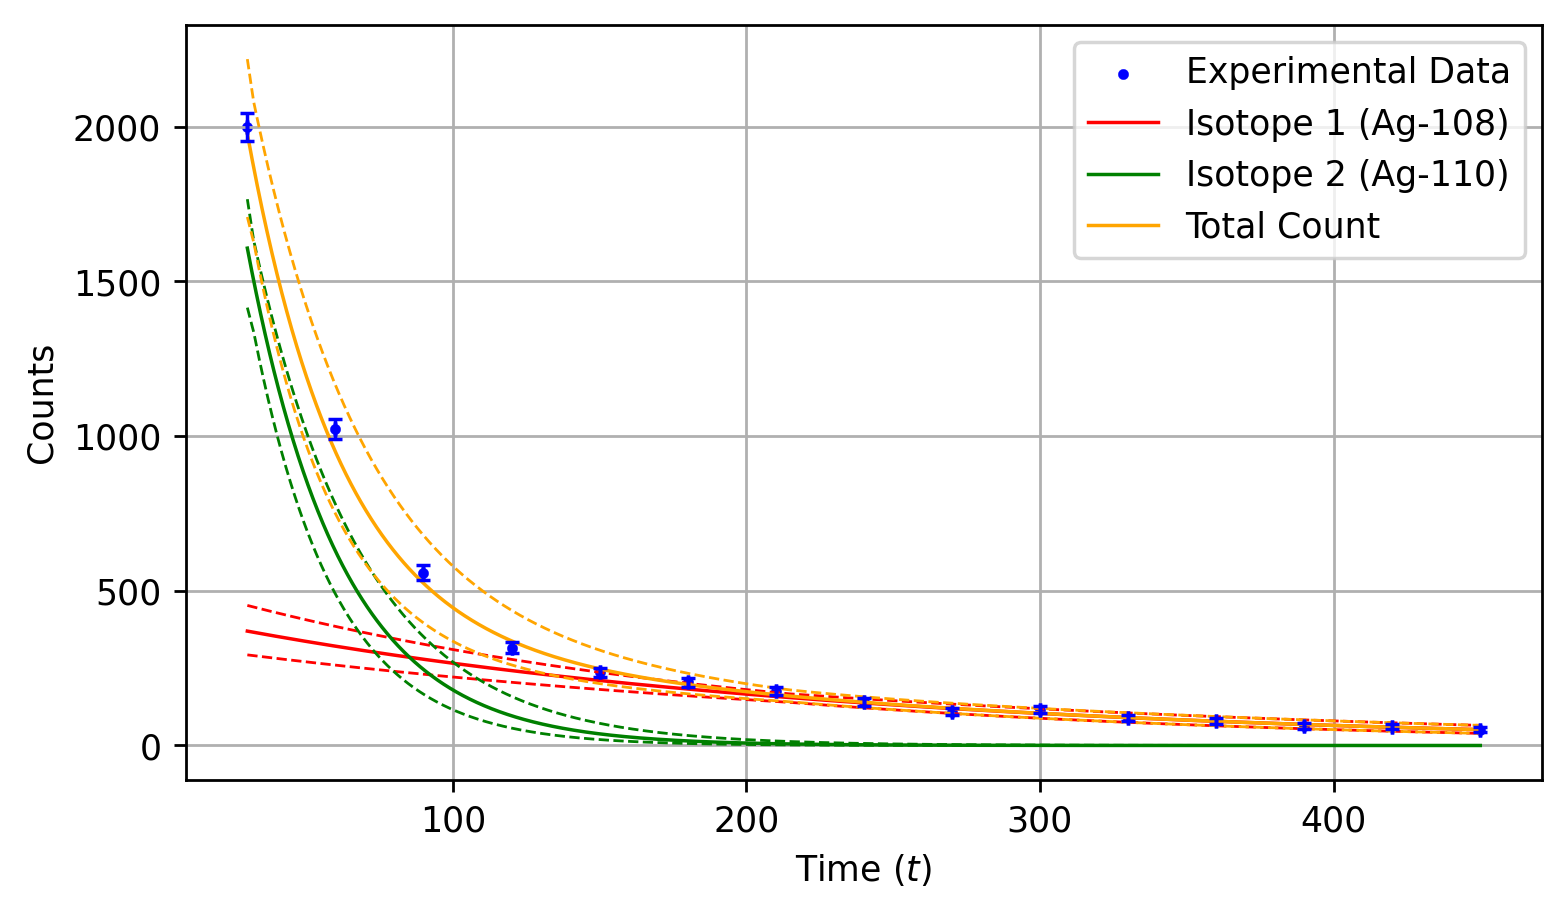

147.25146666382346
23.333663130738906
2.4541911110637242
0.3888943855123151
22.14079303251779
3.169896509682173


In [10]:
# Results here
count = [1999, 1023, 559, 316, 236, 204, 176, 140, 109, 116, 88, 78, 64, 61, 51]
time = [30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390, 420, 450]

# Adjust for other factors
countAdjusted = []
for i in range(len(time)):
    x = count[i] - rad_mean / 5 # Background
    countAdjusted.append(x)

countErrors = []
for i in range(len(count)):
    countErrors.append(countAdjusted[i] * np.sqrt(1 / count[i] + (rad_std / countAdjusted[i])**2))

def decayRate(t, n0, h): # h substitutes for lambda
    return h * n0 * np.exp(-h * t)

# Optimise exponential decay curve fit
popt, pcov = sp.optimize.curve_fit(decayRate, time[7:], count[7:], p0 = [10000, 0.001])
halfLife = np.log(2) / popt[1]

def optDecayRate(t):
    return popt[1] * popt[0] * np.exp(-popt[1] * t)

# Uncertainty calculations
lambdas = []
n0s = []
halfLives = []
for _ in range(10000):
    countNoise = []
    bNoise = np.random.normal(rad_mean, rad_std)
    for c in count:
        countNoise.append(np.random.poisson(c) + (np.random.poisson(bNoise/5) - rad_mean/5)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(decayRate, time[7:], countNoise[7:], p0 = [10000, 0.001])
    lambdas.append(poptErr[1])
    n0s.append(poptErr[0])
    halfLives.append(np.log(2) / poptErr[1])
herr = np.std(lambdas)
nerr = np.std(n0s)
print(popt)
print([nerr, herr])

h = popt[1]

    
def minDecayRatea(t):
    return (popt[1] - herr) * (popt[0] + nerr) * np.exp(-(popt[1] - herr) * t)

def maxDecayRatea(t):
    return (popt[1] + herr) * (popt[0] - nerr) * np.exp(-(popt[1] + herr) * t)

def minDecayRateb(t):
    return (popt[1] - herr) * (popt[0] - nerr) * np.exp(-(popt[1] - herr) * t)

def maxDecayRateb(t):
    return (popt[1] + herr) * (popt[0] + nerr) * np.exp(-(popt[1] + herr) * t)

def minDecayRate(t):
    return min(minDecayRatea(t), maxDecayRatea(t), minDecayRateb(t), maxDecayRateb(t))
def maxDecayRate(t):
    return max(minDecayRatea(t), maxDecayRatea(t), minDecayRateb(t), maxDecayRateb(t))

# Account for previous curve and redo fit

newCount = []
for i in range(len(count)):
    newCount.append(countAdjusted[i] - optDecayRate(time[i]))

popt2, pcov2 = sp.optimize.curve_fit(decayRate, time, newCount, p0 = [10000, 0.001])
halfLife2 = np.log(2) / popt2[1]

def optDecayRate2(t):
    return popt2[1] * popt2[0] * np.exp(-popt2[1] * t)

# Uncertainty calculations
lambdas2 = []
n0s2 = []
halfLives2 = []
for _ in range(10000):
    countNoise = []
    bNoise = np.random.normal(rad_mean, rad_std)
    for i in range(len(count)):
        countNoise.append(np.random.poisson(countAdjusted[i]) - optDecayRate(time[i]) + np.random.normal(0, abs(minDecayRate(time[i]) - maxDecayRate(time[i]))) + (np.random.poisson(bNoise/5) - rad_mean/5)) # Accounts for background noise
    poptErr, pcovErr = sp.optimize.curve_fit(decayRate, time, countNoise, p0 = [10000, 0.001])
    lambdas2.append(poptErr[1])
    n0s2.append(poptErr[0])
    halfLives2.append(np.log(2) / poptErr[1])
herr2 = np.std(lambdas2)
nerr2 = np.std(n0s2)
print(popt2)
print([nerr2, herr2])

def minDecayRate2a(t):
    return (popt2[1] - herr2) * (popt2[0] + nerr2) * np.exp(-(popt2[1] - herr2) * t)

def maxDecayRate2a(t):
    return (popt2[1] + herr2) * (popt2[0] - nerr2) * np.exp(-(popt2[1] + herr2) * t)

def minDecayRate2b(t):
    return (popt2[1] - herr2) * (popt2[0] - nerr2) * np.exp(-(popt2[1] - herr2) * t)

def maxDecayRate2b(t):
    return (popt2[1] + herr2) * (popt2[0] + nerr2) * np.exp(-(popt2[1] + herr2) * t)

def minDecayRate2(t):
    return min(minDecayRate2a(t), maxDecayRate2a(t), minDecayRate2b(t), maxDecayRate2b(t))
def maxDecayRate2(t):
    return max(minDecayRate2a(t), maxDecayRate2a(t), minDecayRate2b(t), maxDecayRate2b(t))


def optTotal(t):
    return optDecayRate(t) + optDecayRate2(t)
def minTotal(t):
    return minDecayRate(t) + minDecayRate2(t)
def maxTotal(t):
    return maxDecayRate(t) + maxDecayRate2(t)

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(time, count, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
s = np.linspace(min(time), max(time), 2500)
plt.plot(s, optDecayRate(s), c = 'red', linewidth = 1, label = 'Isotope 1 (Ag-108)')
min1 = []
max1 = []
for x in s:
    min1.append(minDecayRate(x))
    max1.append(maxDecayRate(x))
plt.plot(s, min1, c = 'red', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, max1, c = 'red', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, optDecayRate2(s), c = 'green', linewidth = 1, label = 'Isotope 2 (Ag-110)')
min2 = []
max2 = []
for x in s:
    min2.append(minDecayRate2(x))
    max2.append(maxDecayRate2(x))
plt.plot(s, min2, c = 'green', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, max2, c = 'green', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, optTotal(s), c = 'orange', linewidth = 1, label = 'Total Count')
minTot = []
maxTot = []
for x in s:
    minTot.append(minTotal(x))
    maxTot.append(maxTotal(x))
plt.plot(s, minTot, c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.plot(s, maxTot, c = 'orange', linestyle = 'dashed', linewidth = 0.8)
plt.grid()
plt.errorbar(time, count, fmt='b,', xerr = 0, yerr = countErrors, capsize = 2, linewidth = 1)
plt.xlabel('Time ($t$)')
plt.ylabel('Counts')
plt.legend()
plt.show()

print(halfLife)
print(np.std(halfLives))
print(halfLife / 60)
print(np.std(halfLives) / 60)
print(halfLife2)
print(np.std(halfLives2))

While there isn't much of a visible difference in the graph, the half-lives found from this are subtly different. For Ag-108, the half-life is $150 \pm 20$ seconds or $2.5 \pm 0.4$ minutes, while for Ag-110 the half-life is $22 \pm 3$ seconds. In both cases, this brings the values closer to empirically accapted values (2.4 minutes for Ag-108, 24 seconds for Ag-110), and both are within experimental uncertainties.

### Uncertainties and Sources of Error

Predominantly, these were the same as in previous experiments, and accounting for them was more or less the same process. That being said, accounting for errors in the analysis above (determining the second isotope) was very difficult. I've done my best to introduce random noise with the right distributions at the right places in order to generate the uncertainty estimates, but these were complicated and could be incorrect, so should not be trusted as rigorous.

### Future Improvements and Extensions

The main possible extension of this experiment was to determine the other isotope and its half-life, which was done successfully. Overall, there isn't a great deal extra that could be done that's relevant to this experiment besides the usual stuff like taking more readings (i.e. more trials) and reducing the time increments used to get a better idea of the distribution.

One other thing that *could* have been done here is to record the amount of time between removing the sample from the well and starting the recording. This would have allowed us to find the relative abundances of Ag-108 and Ag-110. Not knowing how this is correlated to the abundances of Ag-107 and Ag-109 in an inactive sample, however, means this is not a particularly interesting question.

## Conclusion

This experiment found that 2 types of radioactive isotope were present in the silver sample after irradiation, Ag-108 and Ag-110, with experimenrally measured half-lives agreeing within uncertainties with accepted values. This also suggests that the silver sample used contained both common (abundant and stable) isotopes of silver when inactive, being Ag-107 and Ag-109.

# Experiment 4: Effect of Shielding

## Method

As in student notes.

## Results

Each indium disk was irradiated for 10 minutes, allowed to rest for 2 minutes, then had counts recorded for a further 10 minutes. The count as well as the shielding are listed below. As before, adjusted counts accounts for background radiation, and listed to the nearest integer for faithful representation of the actual results. Uncertainty in adjusted count was calculated by adding absolute errors in quadrature.

Shielding | Count | Adjusted Count
:--:|:--:|:--:
No Shield | 860 $\pm$ 29 | 530 $\pm$ 34
Lead Shield | 908 $\pm$ 30 | 578 $\pm$ 34
Cadmium Shield | 380 $\pm$ 19 | 50 $\pm$ 26
Indium Shield | 650 $\pm$ 25 | 320 $\pm$ 30

No Shield | 860 $\pm$ 29 | 530 $\pm$ 34
Lead Shield | 908 $\pm$ 30 | 578 $\pm$ 34
Cadmium Shield | 380 $\pm$ 19 | 50 $\pm$ 26
Indium Shield | 650 $\pm$ 25 | 320 $\pm$ 30


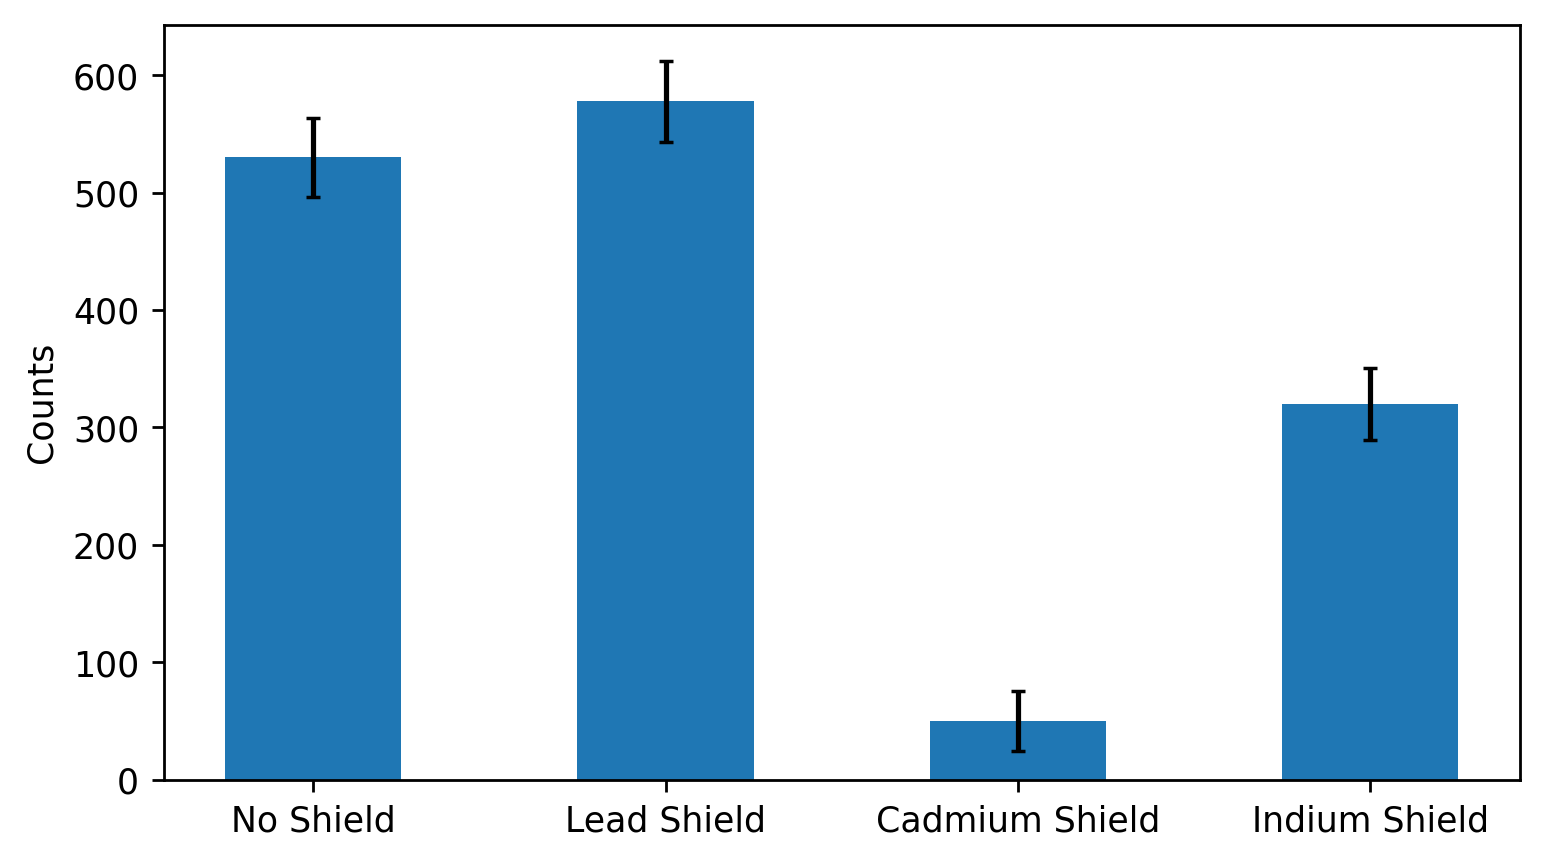

In [11]:
# Results here
experiment = ['No Shield', 'Lead Shield', 'Cadmium Shield', 'Indium Shield']
count = [860, 908, 380, 650] # For 10 minutes

countAdjusted = []
countErrors = []
for i in range(len(count)):
    x = count[i] - rad_mean * 2
    countAdjusted.append(x)
    countErrors.append(np.sqrt(count[i] + (2 * rad_std)**2))
    print(experiment[i], '|', count[i], '$\pm$', round(np.sqrt(count[i])), '|', round(countAdjusted[i]), '$\pm$', round(countErrors[i]))

plt.figure(figsize=(7,4), dpi = 250)
plt.bar(experiment, countAdjusted, width = 0.5, yerr = countErrors, capsize = 2)
plt.ylabel('Counts')
plt.show()

## Questions

6. *Which metal is the best thermal neutron shield?*

    Cadmium, since the count is most dramatically reduced for cadmium shielding.


7. *In experiment 2, why aren’t all the In discs irradiated together, in the same bucket, and pulled out one at a time for counting at appropriate times?*

    Due to the shielding effect that this experiment clearly demonstrates. If samples were taken in turn, the irradiation each sample receives would not be linear in time.
    

## Discussion

### Analysis of Results

The results here are actually quite interesting. We had expected lead to be the best shield, on account of it being commonly used to shield from x-rays, gamma radiation, and similar. Presumably the difference is that these are photons, whereas radiation from the indium was beta radiation (electrons) and lead apparently doesn't shield against beta decay at all. The fact that the count with lead shielding is higher than with no shielding is curious, but uncertainties on this don't disprove the hypothesis that lead just provides zero shielding.

Indium and cadmium both appear to shield against beta decay. Cadmium represents an almost complete shield against beta decay, even though the cadmium samples didn't cover the entire indium sample.

### Uncertainties and Sources of Error

There are several potential sources of error in this experiment. Beyond what has already been discussed, the biggest issue is that some of the samples may have some residual irradiation from previous experiments done by others in the morning lab session. Given each sample was only irradiated for 10 minutes, this is likely a substantial source of error and might have dramatically thrown off results. Unfortunately, there's no real way of knowing with the data that we have.

### Future Improvements and Extensions

The biggest issue with this experiment is that there is only one data point for each part. A future experiment could take many different readings of each experiment to get a better idea of the true value and error.

Further, if this experiment was to be repeated, the samples should be irradiated for longer periods of time. This would mean that the effect of any prior irradiation the samples had would be minimised.

## Conclusion

Cadmium works very well as a shield to beta radiation, indium works fairly well and lead works about as well as air (i.e. not at all). There are many improvements to this experiment that could make it much more reliable.
    
# Experiment 5a: Half-Life of Copper Isotope

## Method

As in student notes. Copper disc was irradiated for 1 hour, left to sit for 2 minutes, and measured for 49 minutes (60 minutes was intended, but recording was stopped once the count reached background levels) with 60 second increments.

## Results

This experiment presents a fairly unique opportunity to test whether the bundling of counts into larger preset counting times substantially affects data. Since this experiment was done using 60 second counts, the data can be bundled into integer numbers of minutes. I've done this up to (arbitrarily) 7 minutes. In all cases, the data has been normalised by the number of minutes included in each bucket (i.e. 5 minute counts are divided by 5). The individual data points shown (with the error bars) are of the one minute counts.

Trial | Ending Time ($s$) | Count | Adjusted Count
:--:|:--:|:--:|:--:|
1 | 60 | 71 $\pm$ 8 | 38 $\pm$ 9
2 | 120 | 69 $\pm$ 8 | 36 $\pm$ 8
3 | 180 | 70 $\pm$ 8 | 37 $\pm$ 9
4 | 240 | 61 $\pm$ 8 | 28 $\pm$ 8
5 | 300 | 70 $\pm$ 8 | 37 $\pm$ 9
6 | 360 | 53 $\pm$ 7 | 20 $\pm$ 7
7 | 420 | 50 $\pm$ 7 | 17 $\pm$ 7
8 | 480 | 52 $\pm$ 7 | 19 $\pm$ 7
9 | 540 | 51 $\pm$ 7 | 18 $\pm$ 7
10 | 600 | 44 $\pm$ 7 | 11 $\pm$ 7
11 | 660 | 38 $\pm$ 6 | 5 $\pm$ 6
12 | 720 | 35 $\pm$ 6 | 2 $\pm$ 6
13 | 780 | 42 $\pm$ 6 | 9 $\pm$ 7
14 | 840 | 38 $\pm$ 6 | 5 $\pm$ 6
15 | 900 | 34 $\pm$ 6 | 1 $\pm$ 6
16 | 960 | 40 $\pm$ 6 | 7 $\pm$ 7
17 | 1020 | 42 $\pm$ 6 | 9 $\pm$ 7
18 | 1080 | 42 $\pm$ 6 | 9 $\pm$ 7
19 | 1140 | 33 $\pm$ 6 | 0 $\pm$ 6
20 | 1200 | 38 $\pm$ 6 | 5 $\pm$ 6
21 | 1260 | 32 $\pm$ 6 | -1 $\pm$ 6
22 | 1320 | 33 $\pm$ 6 | 0 $\pm$ 6
23 | 1380 | 37 $\pm$ 6 | 4 $\pm$ 6
24 | 1440 | 37 $\pm$ 6 | 4 $\pm$ 6
25 | 1500 | 29 $\pm$ 5 | -4 $\pm$ 6
26 | 1560 | 34 $\pm$ 6 | 1 $\pm$ 6
27 | 1620 | 30 $\pm$ 5 | -3 $\pm$ 6
28 | 1680 | 24 $\pm$ 5 | -9 $\pm$ 5
29 | 1740 | 28 $\pm$ 5 | -5 $\pm$ 6
30 | 1800 | 22 $\pm$ 5 | -11 $\pm$ 5
31 | 1860 | 39 $\pm$ 6 | 6 $\pm$ 6
32 | 1920 | 25 $\pm$ 5 | -8 $\pm$ 5
33 | 1980 | 26 $\pm$ 5 | -7 $\pm$ 5
34 | 2040 | 35 $\pm$ 6 | 2 $\pm$ 6
35 | 2100 | 50 $\pm$ 7 | 17 $\pm$ 7
36 | 2160 | 36 $\pm$ 6 | 3 $\pm$ 6
37 | 2220 | 39 $\pm$ 6 | 6 $\pm$ 6
38 | 2280 | 37 $\pm$ 6 | 4 $\pm$ 6
39 | 2340 | 36 $\pm$ 6 | 3 $\pm$ 6
40 | 2400 | 46 $\pm$ 7 | 13 $\pm$ 7
41 | 2460 | 48 $\pm$ 7 | 15 $\pm$ 7
42 | 2520 | 36 $\pm$ 6 | 3 $\pm$ 6
43 | 2580 | 39 $\pm$ 6 | 6 $\pm$ 6
44 | 2640 | 33 $\pm$ 6 | 0 $\pm$ 6
45 | 2700 | 38 $\pm$ 6 | 5 $\pm$ 6
46 | 2760 | 34 $\pm$ 6 | 1 $\pm$ 6
47 | 2820 | 27 $\pm$ 5 | -6 $\pm$ 5
48 | 2880 | 42 $\pm$ 6 | 9 $\pm$ 7
49 | 2940 | 43 $\pm$ 7 | 10 $\pm$ 7

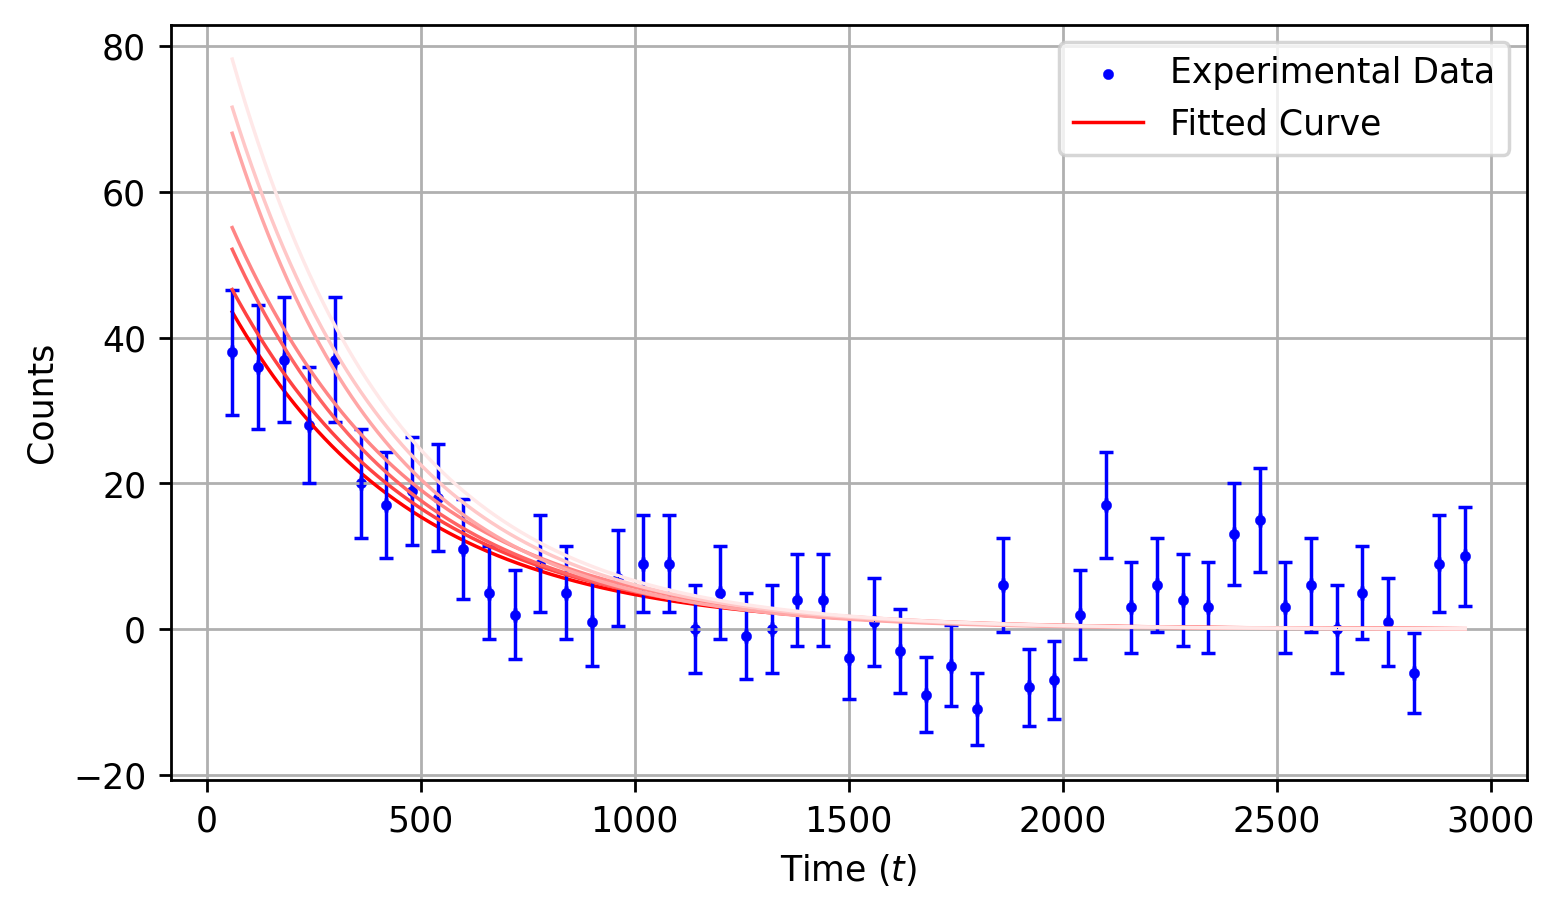

In [12]:
# Results
str = '''Run	High		Elapsed
Number	Voltage	Counts	Time	Date/Time
1	950	71	60	02/25/21 03:26:02 PM	
2	950	69	60	02/25/21 03:27:15 PM	
3	950	70	60	02/25/21 03:28:15 PM	
4	950	61	60	02/25/21 03:29:15 PM	
5	950	70	60	02/25/21 03:30:15 PM	
6	950	53	60	02/25/21 03:31:15 PM	
7	950	50	60	02/25/21 03:32:15 PM	
8	950	52	60	02/25/21 03:33:15 PM	
9	950	51	60	02/25/21 03:34:15 PM	
10	950	44	60	02/25/21 03:35:16 PM	
11	950	38	60	02/25/21 03:36:16 PM	
12	950	35	60	02/25/21 03:37:16 PM	
13	950	42	60	02/25/21 03:38:16 PM	
14	950	38	60	02/25/21 03:39:16 PM	
15	950	34	60	02/25/21 03:40:17 PM	
16	950	40	60	02/25/21 03:41:17 PM	
17	950	42	60	02/25/21 03:42:17 PM	
18	950	42	60	02/25/21 03:43:17 PM	
19	950	33	60	02/25/21 03:44:17 PM	
20	950	38	60	02/25/21 03:45:17 PM	
21	950	32	60	02/25/21 03:46:17 PM	
22	950	33	60	02/25/21 03:47:17 PM	
23	950	37	60	02/25/21 03:48:18 PM	
24	950	37	60	02/25/21 03:49:18 PM	
25	950	29	60	02/25/21 03:50:18 PM	
26	950	34	60	02/25/21 03:51:18 PM	
27	950	30	60	02/25/21 03:52:18 PM	
28	950	24	60	02/25/21 03:53:18 PM	
29	950	28	60	02/25/21 03:54:18 PM	
30	950	22	60	02/25/21 03:55:19 PM	
31	950	39	60	02/25/21 03:56:19 PM	
32	950	25	60	02/25/21 03:57:19 PM	
33	950	26	60	02/25/21 03:58:19 PM	
34	950	35	60	02/25/21 03:59:19 PM	
35	950	50	60	02/25/21 04:00:19 PM	
36	950	36	60	02/25/21 04:01:19 PM	
37	950	39	60	02/25/21 04:02:20 PM	
38	950	37	60	02/25/21 04:03:20 PM	
39	950	36	60	02/25/21 04:04:20 PM	
40	950	46	60	02/25/21 04:05:20 PM	
41	950	48	60	02/25/21 04:06:20 PM	
42	950	36	60	02/25/21 04:07:20 PM	
43	950	39	60	02/25/21 04:08:20 PM	
44	950	33	60	02/25/21 04:09:20 PM	
45	950	38	60	02/25/21 04:10:21 PM	
46	950	34	60	02/25/21 04:11:21 PM	
47	950	27	60	02/25/21 04:12:21 PM	
48	950	42	60	02/25/21 04:13:21 PM	
49	950	43	60	02/25/21 04:14:21 PM	
'''
str = str.split('\n')
for i in range(len(str)):
    str[i] = str[i].split('	')
data = []
t = []
for i in range(len(str)):
    try:
        data.append(int(str[i][2]))
        t.append(60 * (i - 1))
    except:
        pass

    
hlExp5 = []
hlExp5err = []

scale = 0
plt.figure(figsize = (7, 4), dpi = 250)
for inc in range(1, 8):
    count = []
    time = []
    i = 0
    while i < len(data):
        x = data[i:i + inc]
        y = t[i:i + inc]
        if len(x) == inc:
            count.append(sum(x))
            time.append(max(y))
        else:
            break
        i += inc

    # Adjust for other factors
    countAdjusted = []
    for i in range(len(count)):
        x = count[i] - (rad_mean/5 * inc) # Background
        countAdjusted.append(x)

    countErrors = []
    for i in range(len(count)):
        countErrors.append(np.sqrt(count[i] + (inc * rad_std / 5)**2))


    def decayRate(t, n0, h): # h substitutes for lambda
        return h * n0 * np.exp(-h * t)
    
    popt, pcov = sp.optimize.curve_fit(decayRate, time, countAdjusted, p0 = [10000, 0.001], maxfev = 25000)
    halfLife = np.log(2) / popt[1]
    #print(halfLife)

    def optDecayRate(t):
        return popt[1] * popt[0] * np.exp(-popt[1] * t)


    lambdas = []
    n0s = []
    halfLives = []
    for _ in range(1000):
        countNoise = []
        bNoise = np.random.normal(rad_mean, rad_std)
        for i in range(len(count)):
            countNoise.append(np.random.normal(countAdjusted[i], countErrors[i])) # Accounts for background noise
        poptErr, pcovErr = sp.optimize.curve_fit(decayRate, time, countNoise, p0 = [10000, 0.001], maxfev = 25000)
        lambdas.append(poptErr[1])
        n0s.append(poptErr[0])
        halfLives.append(np.log(2) / poptErr[1])
    herr = np.std(lambdas)
    nerr = np.std(n0s)

    def decayRate1(t):
        return (popt[1] - herr) * (popt[0] - nerr) * np.exp(-(popt[1] - herr) * t)

    def decayRate2(t):
        return (popt[1] + herr) * (popt[0] - nerr) * np.exp(-(popt[1] + herr) * t)

    def decayRate3(t):
        return (popt[1] - herr) * (popt[0] + nerr) * np.exp(-(popt[1] - herr) * t)

    def decayRate4(t):
        return (popt[1] + herr) * (popt[0] + nerr) * np.exp(-(popt[1] + herr) * t)

    def minDecayRate(t):
        return min(decayRate1(t), decayRate2(t), decayRate3(t), decayRate4(t))

    def maxDecayRate(t):
        return max(decayRate1(t), decayRate2(t), decayRate3(t), decayRate4(t))


    # Graph data
    s = np.linspace(min(t), max(t), 2500)
    param = 0.13
    
    if inc == 1:
        plt.scatter(time, countAdjusted, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
        plt.plot(s, optDecayRate(s) / inc, c = (1, param * (inc - 1), param * (inc - 1)), linewidth = 1, label = 'Fitted Curve')
        plt.errorbar(time, countAdjusted, fmt='b,', xerr = 0, yerr = countErrors, capsize = 2, linewidth = 1)
        scale = optDecayRate(0)
    else:
        plt.plot(s, optDecayRate(s) / inc, c = (1, param * inc, param * inc), linewidth = 1)
    
    hlExp5.append(halfLife)
    hlExp5err.append(np.std(halfLives))

plt.grid()
plt.xlabel('Time ($t$)')
plt.ylabel('Counts')
plt.legend()
plt.show()


Here, lighter shades of red represent larger buciet sizes. Due to the fitted initial counts being substantially different with the different fits, it's not possible to see a visual difference in half-lives. This can be fixed by normalising by the fitted initial counts. The graph has to be lengthened somewhat in this case, as it's quite difficult to see the trend otherwise.

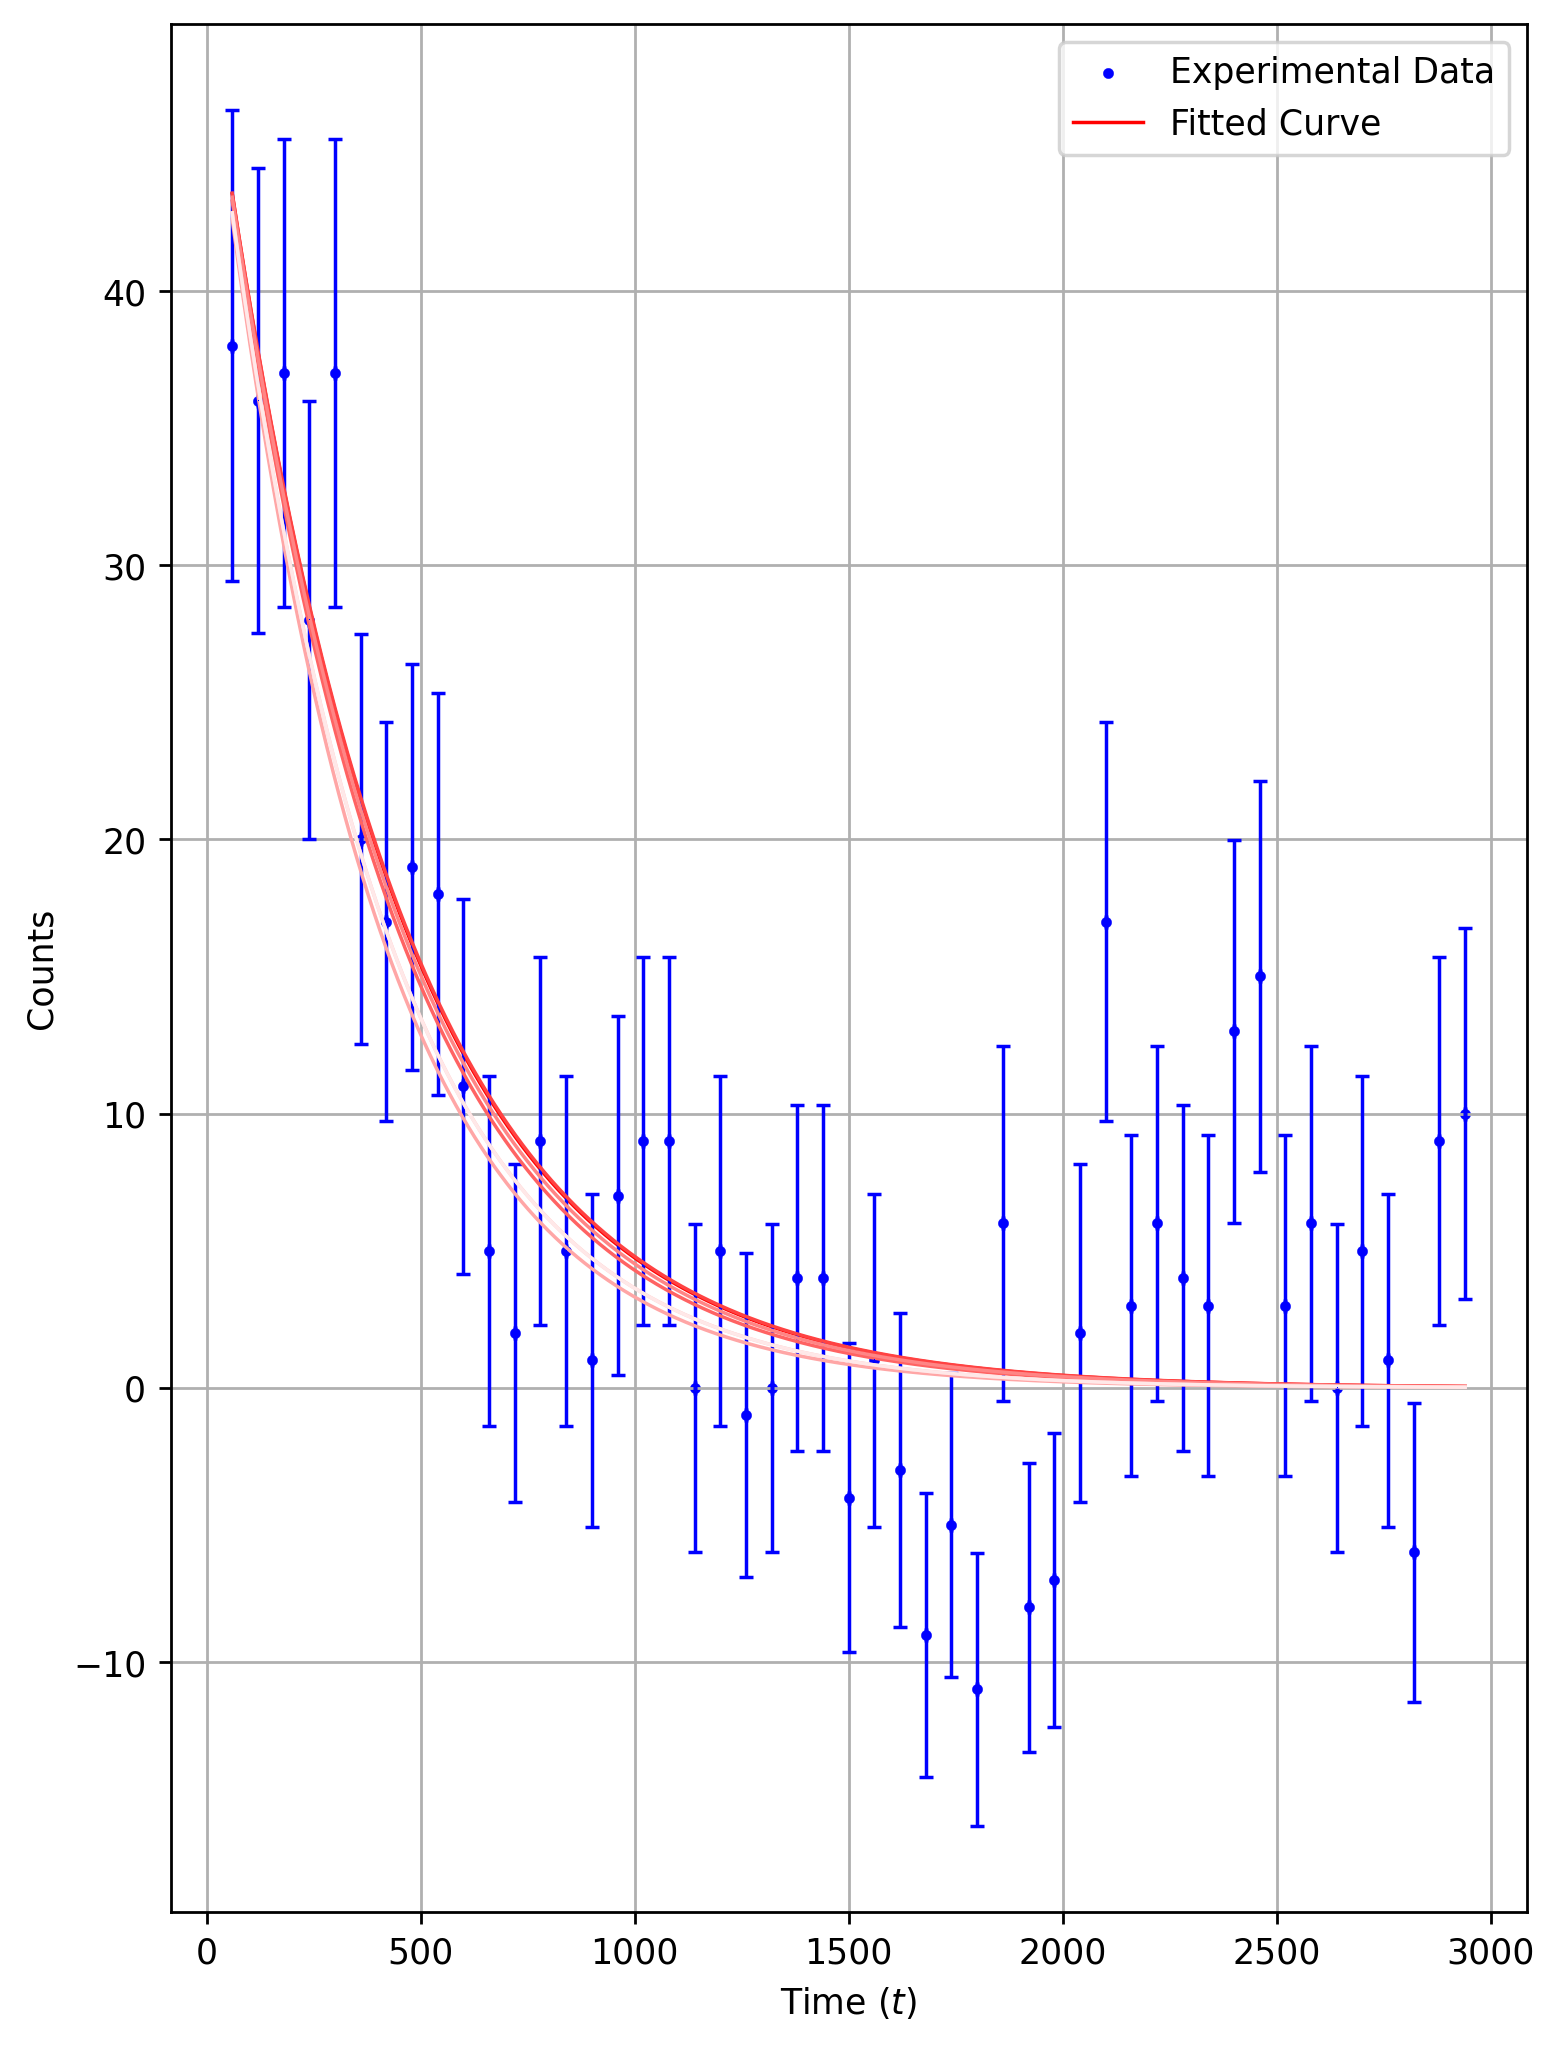

In [13]:
# Results
str = '''Run	High		Elapsed
Number	Voltage	Counts	Time	Date/Time
1	950	71	60	02/25/21 03:26:02 PM	
2	950	69	60	02/25/21 03:27:15 PM	
3	950	70	60	02/25/21 03:28:15 PM	
4	950	61	60	02/25/21 03:29:15 PM	
5	950	70	60	02/25/21 03:30:15 PM	
6	950	53	60	02/25/21 03:31:15 PM	
7	950	50	60	02/25/21 03:32:15 PM	
8	950	52	60	02/25/21 03:33:15 PM	
9	950	51	60	02/25/21 03:34:15 PM	
10	950	44	60	02/25/21 03:35:16 PM	
11	950	38	60	02/25/21 03:36:16 PM	
12	950	35	60	02/25/21 03:37:16 PM	
13	950	42	60	02/25/21 03:38:16 PM	
14	950	38	60	02/25/21 03:39:16 PM	
15	950	34	60	02/25/21 03:40:17 PM	
16	950	40	60	02/25/21 03:41:17 PM	
17	950	42	60	02/25/21 03:42:17 PM	
18	950	42	60	02/25/21 03:43:17 PM	
19	950	33	60	02/25/21 03:44:17 PM	
20	950	38	60	02/25/21 03:45:17 PM	
21	950	32	60	02/25/21 03:46:17 PM	
22	950	33	60	02/25/21 03:47:17 PM	
23	950	37	60	02/25/21 03:48:18 PM	
24	950	37	60	02/25/21 03:49:18 PM	
25	950	29	60	02/25/21 03:50:18 PM	
26	950	34	60	02/25/21 03:51:18 PM	
27	950	30	60	02/25/21 03:52:18 PM	
28	950	24	60	02/25/21 03:53:18 PM	
29	950	28	60	02/25/21 03:54:18 PM	
30	950	22	60	02/25/21 03:55:19 PM	
31	950	39	60	02/25/21 03:56:19 PM	
32	950	25	60	02/25/21 03:57:19 PM	
33	950	26	60	02/25/21 03:58:19 PM	
34	950	35	60	02/25/21 03:59:19 PM	
35	950	50	60	02/25/21 04:00:19 PM	
36	950	36	60	02/25/21 04:01:19 PM	
37	950	39	60	02/25/21 04:02:20 PM	
38	950	37	60	02/25/21 04:03:20 PM	
39	950	36	60	02/25/21 04:04:20 PM	
40	950	46	60	02/25/21 04:05:20 PM	
41	950	48	60	02/25/21 04:06:20 PM	
42	950	36	60	02/25/21 04:07:20 PM	
43	950	39	60	02/25/21 04:08:20 PM	
44	950	33	60	02/25/21 04:09:20 PM	
45	950	38	60	02/25/21 04:10:21 PM	
46	950	34	60	02/25/21 04:11:21 PM	
47	950	27	60	02/25/21 04:12:21 PM	
48	950	42	60	02/25/21 04:13:21 PM	
49	950	43	60	02/25/21 04:14:21 PM	
'''
str = str.split('\n')
for i in range(len(str)):
    str[i] = str[i].split('	')
data = []
t = []
for i in range(len(str)):
    try:
        data.append(int(str[i][2]))
        t.append(60 * (i - 1))
        #print(str[i])
    except:
        pass

    
hlExp5 = []
hlExp5err = []

scale = 0
plt.figure(figsize = (7, 10), dpi = 250)
for inc in range(1, 8):
    count = []
    time = []
    i = 0
    #inc = 3
    while i < len(data):
        x = data[i:i + inc]
        y = t[i:i + inc]
        if len(x) == inc:
            count.append(sum(x))
            time.append(max(y))
        else:
            break
        i += inc

    # Adjust for other factors
    countAdjusted = []
    for i in range(len(count)):
        x = count[i] - (rad_mean/5 * inc) # Background
        #x /= mass[i] # Adjust for mass
        countAdjusted.append(x)

    countErrors = []
    for i in range(len(count)):
        countErrors.append(np.sqrt(count[i] + (inc * rad_std / 5)**2))


    def decayRate(t, n0, h): # h substitutes for lambda
        return h * n0 * np.exp(-h * t)

    
    popt, pcov = sp.optimize.curve_fit(decayRate, time, countAdjusted, p0 = [10000, 0.001], maxfev = 25000)
    halfLife = np.log(2) / popt[1]

    def optDecayRate(t):
        return popt[1] * popt[0] * np.exp(-popt[1] * t)


    lambdas = []
    n0s = []
    halfLives = []
    for _ in range(10000):
        countNoise = []
        bNoise = np.random.normal(rad_mean, rad_std)
        for i in range(len(count)):
            countNoise.append(np.random.normal(countAdjusted[i], countErrors[i])) # Accounts for background noise
        poptErr, pcovErr = sp.optimize.curve_fit(decayRate, time, countNoise, p0 = [10000, 0.001], maxfev = 25000)
        lambdas.append(poptErr[1])
        n0s.append(poptErr[0])
        halfLives.append(np.log(2) / poptErr[1])
    herr = np.std(lambdas)
    nerr = np.std(n0s)

    def decayRate1(t):
        return (popt[1] - herr) * (popt[0] - nerr) * np.exp(-(popt[1] - herr) * t)

    def decayRate2(t):
        return (popt[1] + herr) * (popt[0] - nerr) * np.exp(-(popt[1] + herr) * t)

    def decayRate3(t):
        return (popt[1] - herr) * (popt[0] + nerr) * np.exp(-(popt[1] - herr) * t)

    def decayRate4(t):
        return (popt[1] + herr) * (popt[0] + nerr) * np.exp(-(popt[1] + herr) * t)

    def minDecayRate(t):
        return min(decayRate1(t), decayRate2(t), decayRate3(t), decayRate4(t))

    def maxDecayRate(t):
        return max(decayRate1(t), decayRate2(t), decayRate3(t), decayRate4(t))


    # Graph data
    s = np.linspace(min(t), max(t), 2500)
    param = 0.13
    
    if inc == 1:
        plt.scatter(time, countAdjusted, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Experimental Data')
        plt.plot(s, optDecayRate(s) / inc, c = (1, param * (inc - 1), param * (inc - 1)), linewidth = 1, label = 'Fitted Curve')
        plt.errorbar(time, countAdjusted, fmt='b,', xerr = 0, yerr = countErrors, capsize = 2, linewidth = 1)
        scale = optDecayRate(0)
    else:
        plt.plot(s, optDecayRate(s) * scale / optDecayRate(0), c = (1, param * inc, param * inc), linewidth = 1)
    
    hlExp5.append(halfLife)
    hlExp5err.append(np.std(halfLives))

plt.grid()
plt.xlabel('Time ($t$)')
plt.ylabel('Counts')
plt.legend()
plt.show()


## Discussion

### Analysis of Results

It's reasonably clear from the above graph that there *is* a correlation between the size of the buckets used and the half-life fitted to the data. A colour gradient (red to white) can be seen on the graph (darker red is smaller buckets) that suggests that larger buckets give a slightly longer half-life than smaller buckets. This is a slightly concerning result as it could suggest a systematic error in the data from all previous experiments, but it's difficult to see from the graph exactly how big these errors might be. To do this, let's tabulate and graph the data on the different fitted half-lives.

Increment (minutes) | Fitted Half-Life ($s$)
:--:|:--:
1 | 290 $\pm$ 50
2 | 300 $\pm$ 50
3 | 280 $\pm$ 50
4 | 290 $\pm$ 50
5 | 260 $\pm$ 50
6 | 260 $\pm$ 60
7 | 260 $\pm$ 70

1 | 290 $\pm$ 50
2 | 300 $\pm$ 50
3 | 280 $\pm$ 50
4 | 290 $\pm$ 50
5 | 260 $\pm$ 50
6 | 260 $\pm$ 60
7 | 260 $\pm$ 70


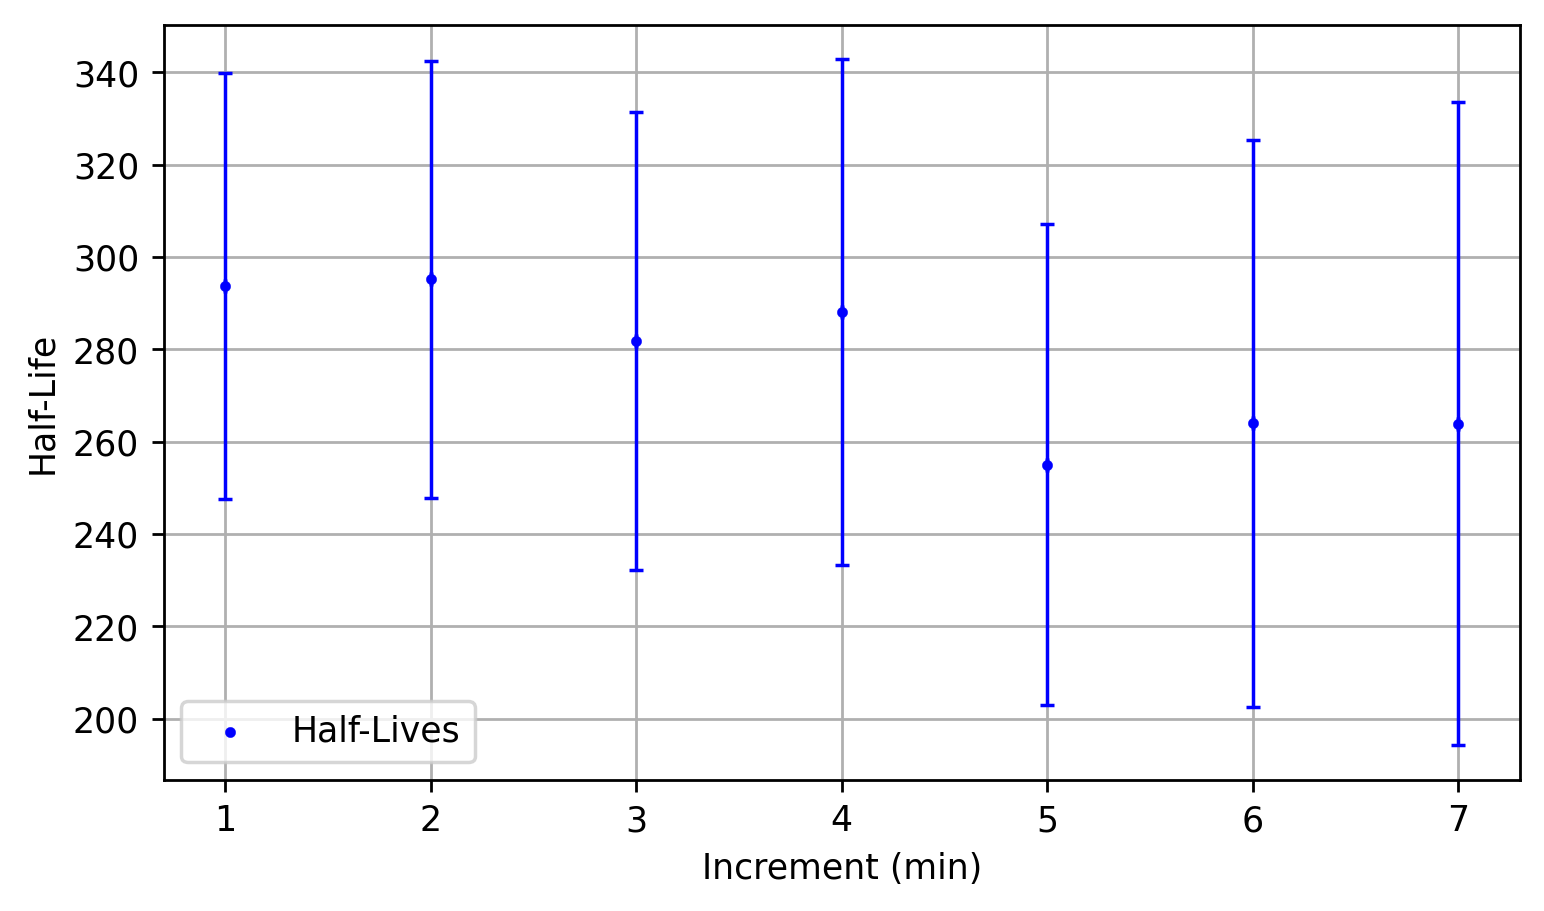

4.896795976182398
0.7685325435737038


In [14]:
hlExp5 = [293.80775857094386, 295.1858108028728, 281.86400026965794, 288.0953566237551, 255.05389598243858, 264.0394131452573, 263.9519725597392]
hlExp5Err = [46.11195261442223, 47.3180779648787, 49.64045885316549, 54.78506686974007, 52.171886690478445, 61.38683882038218, 69.74318463840062]
increments = [1,2,3,4,5,6,7]

for i in range(len(hlExp5)):
    print(i + 1, '|', int(round(hlExp5[i], -1)), '$\pm$', int(round(hlExp5Err[i], -1)))

# Graph data
plt.figure(figsize = (7, 4), dpi = 250)
plt.scatter(increments, hlExp5, marker = '.' , linewidth = 0.1, c = 'blue', label = 'Half-Lives')
plt.grid()
plt.errorbar(increments, hlExp5, fmt='b,', xerr = 0, yerr = hlExp5Err, capsize = 2, linewidth = 1)
plt.xlabel('Increment (min)')
plt.ylabel('Half-Life')
plt.legend()
plt.show()

print(hlExp5[0] / 60)
print(hlExp5Err[0] / 60)

It's not at all reasonable to try to fit a curve of some kind to this, since the shape of it would be unknown. Nevertheless, there are two key trends here. Firstly, the half-life 'gets lower' as the bucket size increases. This makes sense intuitively, as the buckets clump the data together and make it seem closer together. The second trend is that the uncertainties become larger as buckets become larger. This also makes sense, since it effectively reduces the amount of data points that the function can fit to.

All things considered, the most reliable measure of the half-life of copper appears to be when the data is in the smallest buckets possible - in this case, 60 seconds. This gives a half-life of $\tau_{1/2} = 290 \pm 50$ seconds, or $\tau_{1/2} = 4.9 \pm 0.8$ minutes. This seems most likely to be Cu-66, as it has a half-life of 5.1 minutes and is only one atomic mass heavier than Cu-65, a stable and relatively abundant isotope of copper. There are likely to be other isotopes made, such as Cu-64 from the even more abundant Cu-63, but this has a half-life of over half a day so would be very difficult to measure in the limited time-frame we had.

### Uncertainties and Sources of Error

This experiment involved very large uncertainties, mainly because the radiation from the copper *at its peak* was only about as strong as the background radiation, and the decay was still quite fast. This is the main reason the error bars on the graph are so large. The extent of this error caused by background radiation fluctuations can be seen at points towards the end of the graph, where there are substantial deviations from the trendline even in the absence of any real Cu-66 decay.

### Future Improvements and Extensions

Due to the rapid nature of decay for copper, a future experiment should aim to start recording counts as soon as is possible, as long as this time is recorded (for use in the following experiment determining copper content of alloys). This would allow more data points to be taken where the decay was substantial, allowing a better estimate of half-life. In light of reducing bucket sizes apparently making the fit more accurate, a future experiment could try shortening these (possibly down as low as 1 second) to see if this effect continues or if the background noise becomes too much for `scipy.optimize.curve_fit` to handle.

## Conclusion

The half-life of Cu-66 was found to be $4.9 \pm 0.8$ minutes, which is within uncertainties of the accepted value. Evidence was found that decreasing the bucket sizes improved the accuracy of the results, which casts some doubt on earlier half-life results with smaller bucket sizes.

# Experiment 5b: Copper Content of Alloys

## Method

As in student notes. Samples were irradiated for 1 hour, left to sit for 2 minutes, and measured for 10 minutes.

## Results

Count and adjusted count here are exactly the same as they have been the whole time. The copper disk data is yoinked from *Experiment 5a*.

Sample | Count | Adjusted Count
:--:|:--:|:--:
Copper Disc | 591 $\pm$ 24 | 261 $\pm$ 30
Brass Disc | 425 $\pm$ 21 | 95 $\pm$ 27
20c Coin | 485 $\pm$ 22 | 155 $\pm$ 29

Copper Disc | 591 $\pm$ 24 | 261 $\pm$ 30
Brass Disc | 425 $\pm$ 21 | 95 $\pm$ 27
20c Coin | 485 $\pm$ 22 | 155 $\pm$ 29
[261.0, 95.0, 155.0]
[30.347981810987037, 27.477263328068172, 28.548204847240395]


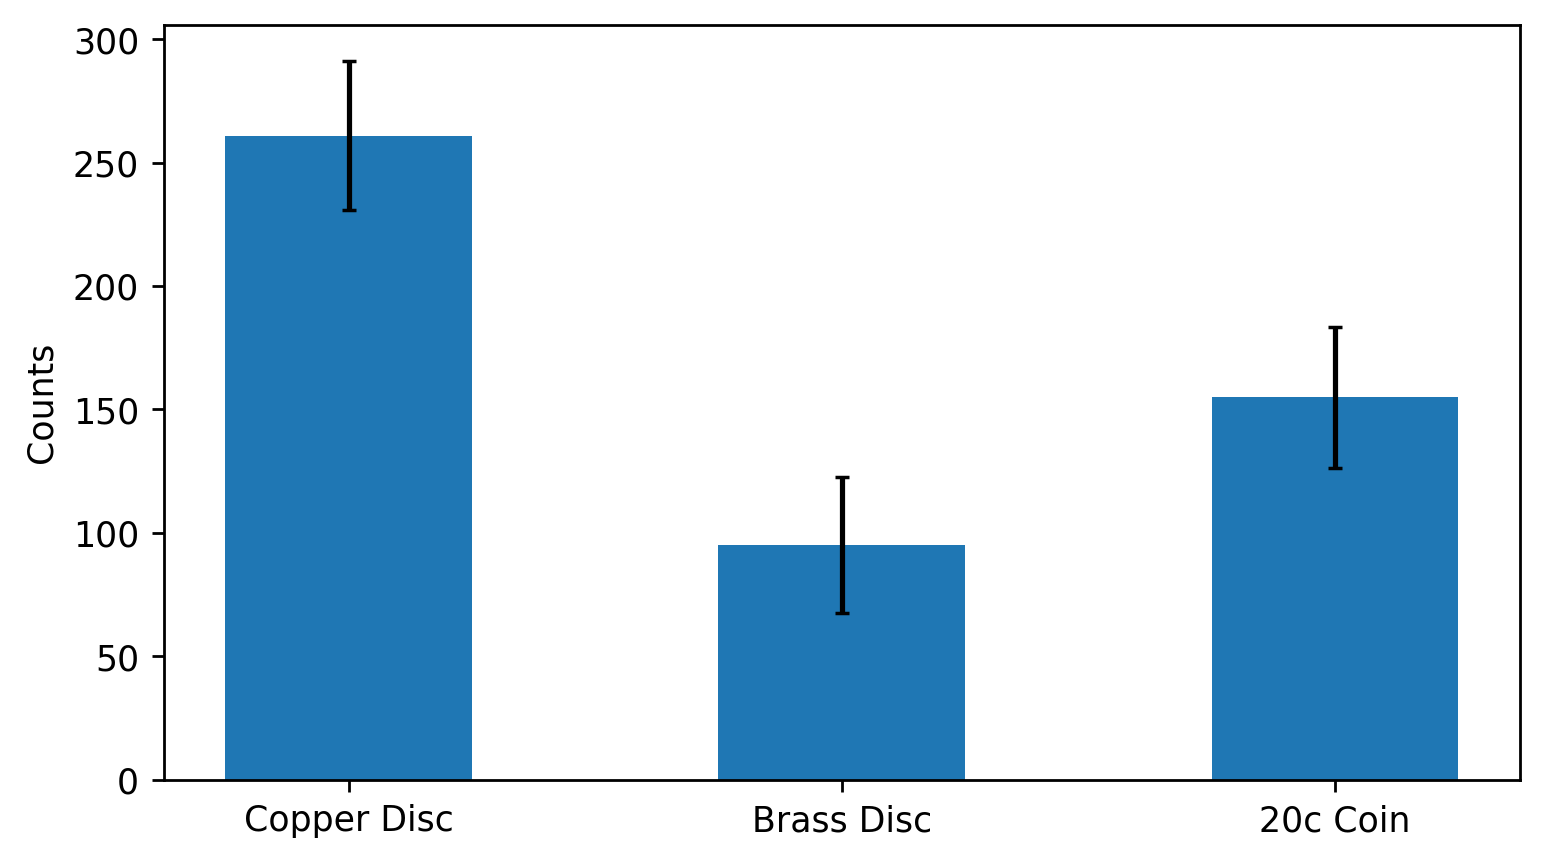

0.3697793122483676 0.6025050769616552
0.1168068756942861 0.13436007876834521


In [15]:
experiment = ['Copper Disc', 'Brass Disc', '20c Coin']
count = [sum(data[0:10]), 425, 485]
countAdjusted = []
countErrors = []
for i in range(len(count)):
    countAdjusted.append(count[i] - rad_mean * 2)
    countErrors.append(np.sqrt(count[i] + 2 * rad_mean))
    print(experiment[i], '|', count[i], '$\pm$', round(np.sqrt(count[i])), '|', round(countAdjusted[i]), '$\pm$', round(countErrors[i]))
print(countAdjusted)
print(countErrors)

plt.figure(figsize=(7,4), dpi = 250)
plt.bar(experiment, countAdjusted, width = 0.5, yerr = countErrors, capsize = 2)
plt.ylabel('Counts')
plt.show()

brassRatios = []
coinRatios = []
for _ in range(100000):
    cop = np.random.poisson(count[0]) - np.random.poisson(2 * rad_mean)
    bra = np.random.poisson(count[1]) - np.random.poisson(2 * rad_mean)
    coi = np.random.poisson(count[2]) - np.random.poisson(2 * rad_mean)
    if min(cop, bra, coi) < 0:
        continue
    brassRatios.append(bra / cop)
    coinRatios.append(coi / cop)
print(np.mean(brassRatios), np.mean(coinRatios))
print(np.std(brassRatios), np.std(coinRatios))

The ratios relevant here, the ratios of the counts of brass or coin to the count of copper, are $0.36\pm0.12$ and $0.60\pm0.13$ respectively. Uncertainties here come from the Poissonian nature of the distribution (can be easily done analytically, but I was lazy so I threw it at Python as a computational task).

## Discussion

### Analysis of Results

It's not really possible to determine the true abundance of copper in the given alloys from the data above. This is due to the fact that there are different stable copper isotopes, and whether the ratios of *these* are the same in the different alloys is not known. If we assume that they *are* the same, then we can say that the brass disc is around $(36\pm11)$% copper and the coin is around $0.60\pm0.13$% copper.

For brass, there are lots of different types of brass with different abundances of copper but this value does seem a little on the small side. This may be due to different relative abundances of the isotopes, or could just be experimental errors. For coin, Australian silver coins are manufactured with 75% copper, which is slightly higher than uncertainty range but not by that much. The explanation for this could be similar to the above explanation for brass and/or coule be due to randomness in the manufacturing process.

### Uncertainties and Sources of Error

The main source of error in this experiment was, as has been the case for most of these experiments, the background radiation. This was accounted for by subtracting the radiation over 10 minutes and adding Poissonian error to the data. Uncertainties in ratios were determined by adding noise to the data 100,000 times and checking the variation in ratios that this caused. Uncertainties in general were quite large due to the relatively few counts obtained compared to some previous experiments.

### Future Improvements and Extensions

The main improvement that could be made to this experiment is to just take more data. The easiest way to do this would be to irradiate more samples and record their counts, in order to reduce the uncertainties in the final ratios.

A possible extension would be to test all Australian silver coins to see if there is any statistical difference in abundances between them, however time unfortunately did not permit this. Australian gold coins could also be tested in the same manner. 

## Conclusion

The brass sample was found to be around $(36\pm11)$% copper and the coin was found to be around $0.60\pm0.13$%. Both of these counts are on the low end of what was expected. While experimental uncertainty can't be ruled out as the cause due to relatively modest differences to theory, further investigation would be required to determine the actual cause of this phenomenon.